## PCA Wine Assignment

In [96]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import scipy.cluster.hierarchy as sch


In [8]:
df = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\PCA\wine.csv")

In [9]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [10]:
df.keys()

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [11]:
#checking for information of our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [12]:
#checking for any null values 
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [13]:
#checking for any duplicated values 
df[df.duplicated()]

Empty DataFrame
Columns: [Type, Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline]
Index: []

In [14]:
#leaving type and selecting all other feature 
df1 = df.iloc[:,1:14]

In [15]:
df1.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [16]:
#checking with shape of our data 
df1.shape

(178, 13)

Alcohol


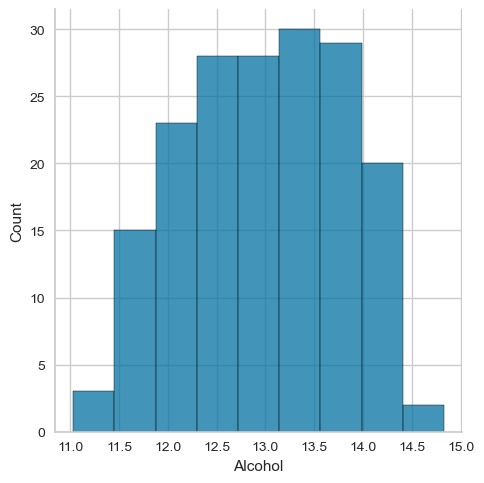

<Figure size 2000x1000 with 0 Axes>

Malic


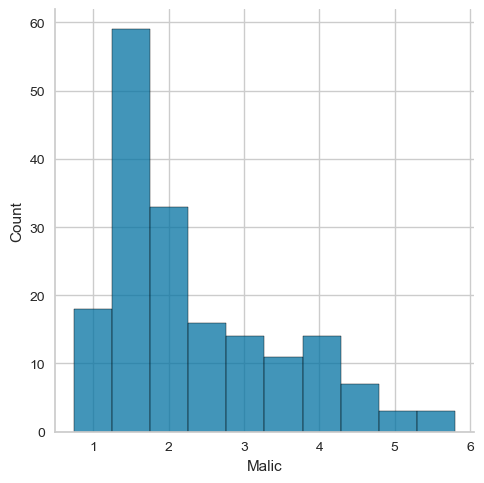

<Figure size 2000x1000 with 0 Axes>

Ash


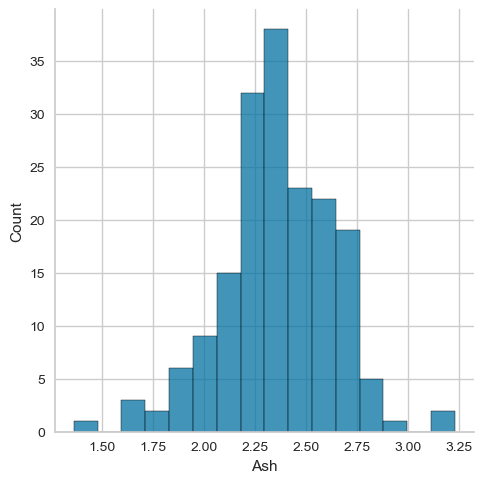

<Figure size 2000x1000 with 0 Axes>

Alcalinity


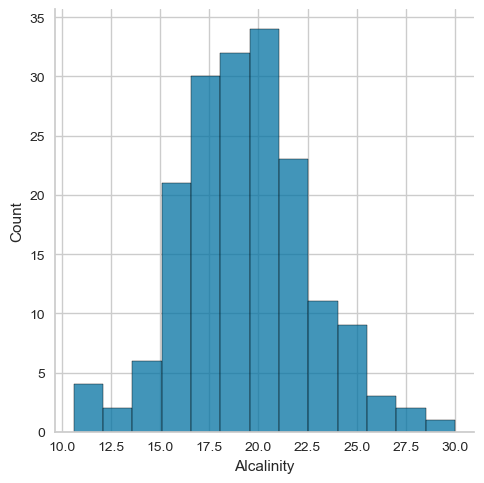

<Figure size 2000x1000 with 0 Axes>

Magnesium


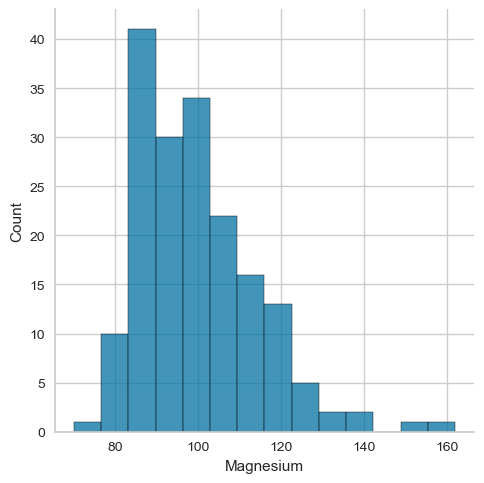

<Figure size 2000x1000 with 0 Axes>

Phenols


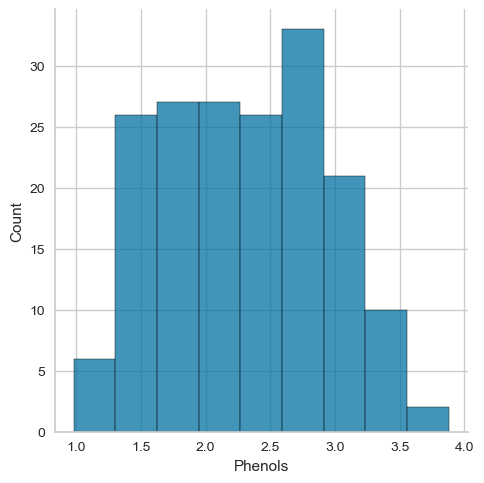

<Figure size 2000x1000 with 0 Axes>

Flavanoids


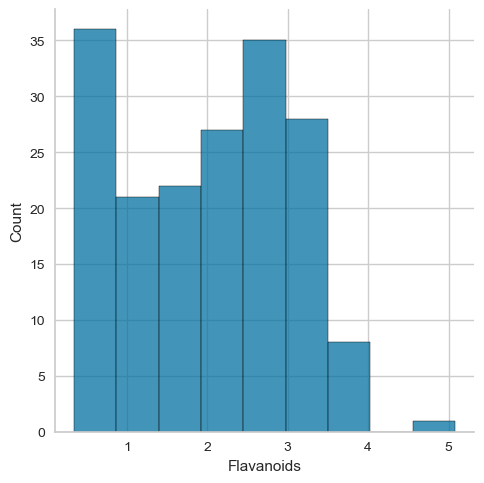

<Figure size 2000x1000 with 0 Axes>

Nonflavanoids


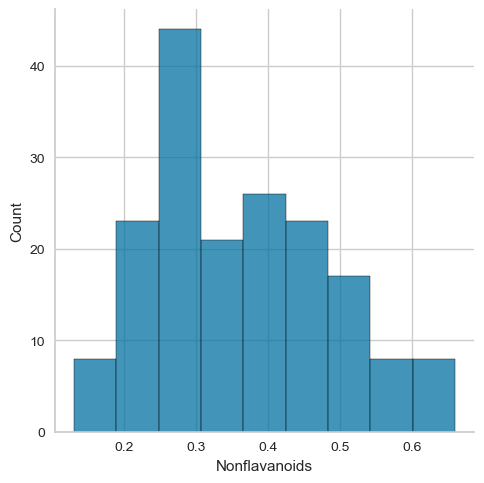

<Figure size 2000x1000 with 0 Axes>

Proanthocyanins


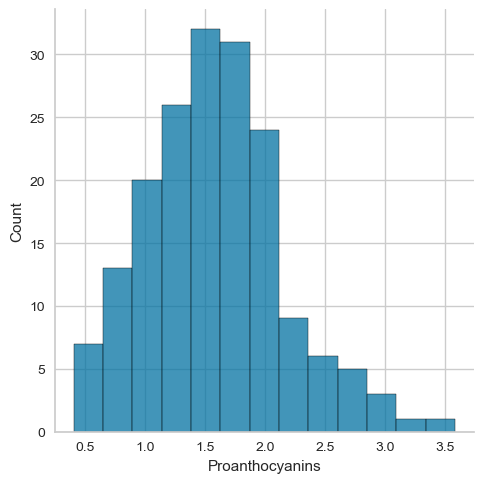

<Figure size 2000x1000 with 0 Axes>

Color


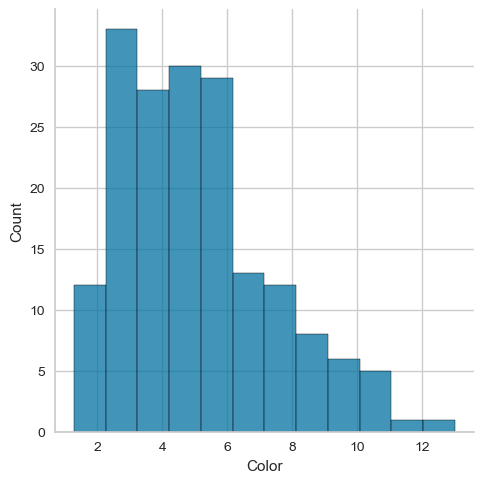

<Figure size 2000x1000 with 0 Axes>

Hue


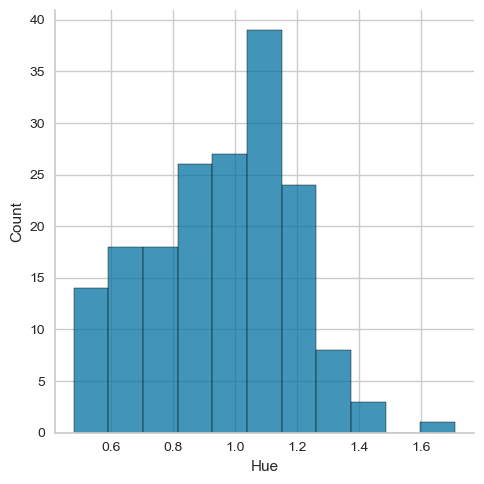

<Figure size 2000x1000 with 0 Axes>

Dilution


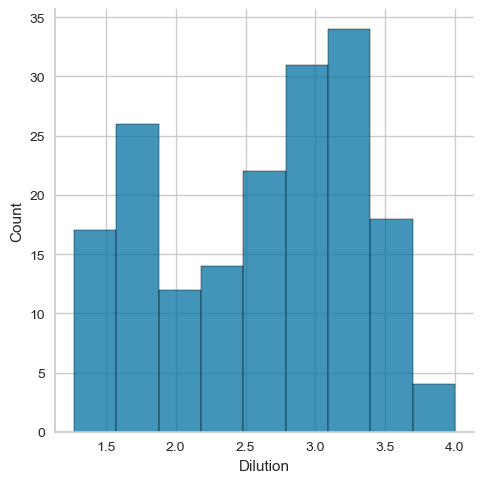

<Figure size 2000x1000 with 0 Axes>

Proline


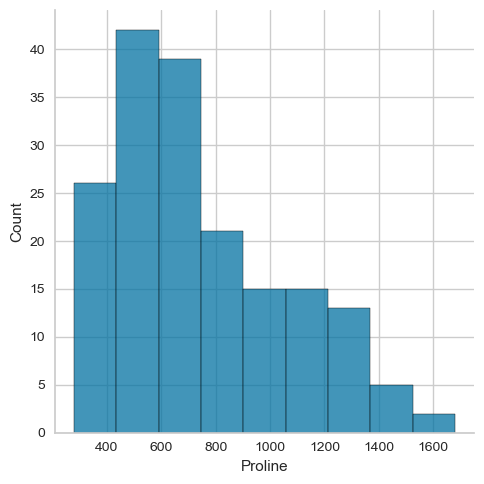

<Figure size 2000x1000 with 0 Axes>

In [17]:
#with skewness and distribution of data 
for n in df1.columns:
    print(n)
    sn.displot(df[n])
    plt.figure(figsize=(20,10))
    plt.show()

In [18]:
#checking with descriptive statistics 
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

<AxesSubplot:>

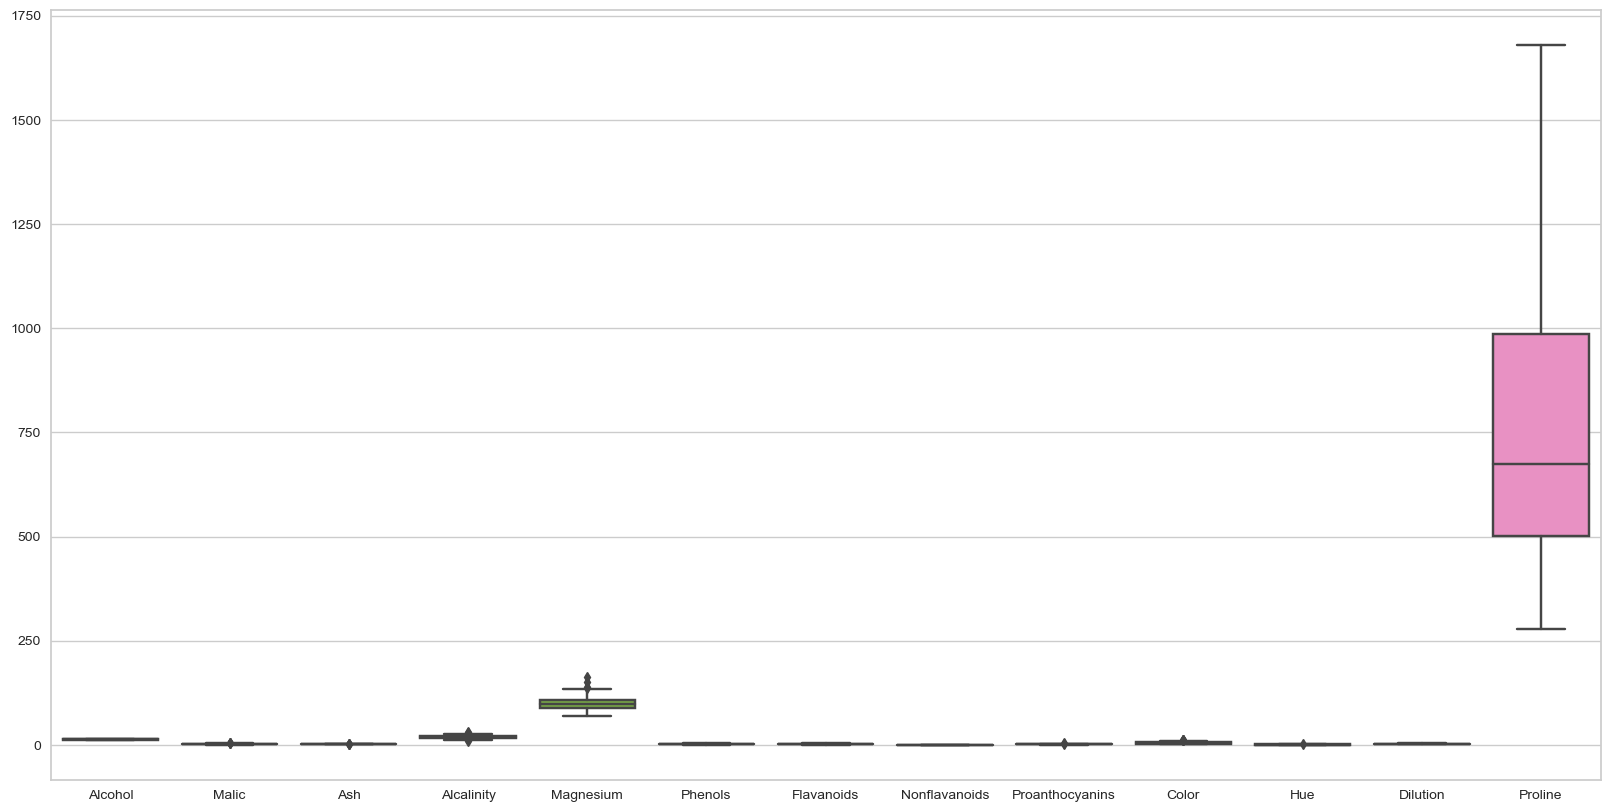

In [19]:
#checking with outliers in the dataset 
plt.figure(figsize=(20,10))
sn.boxplot(data=df1)

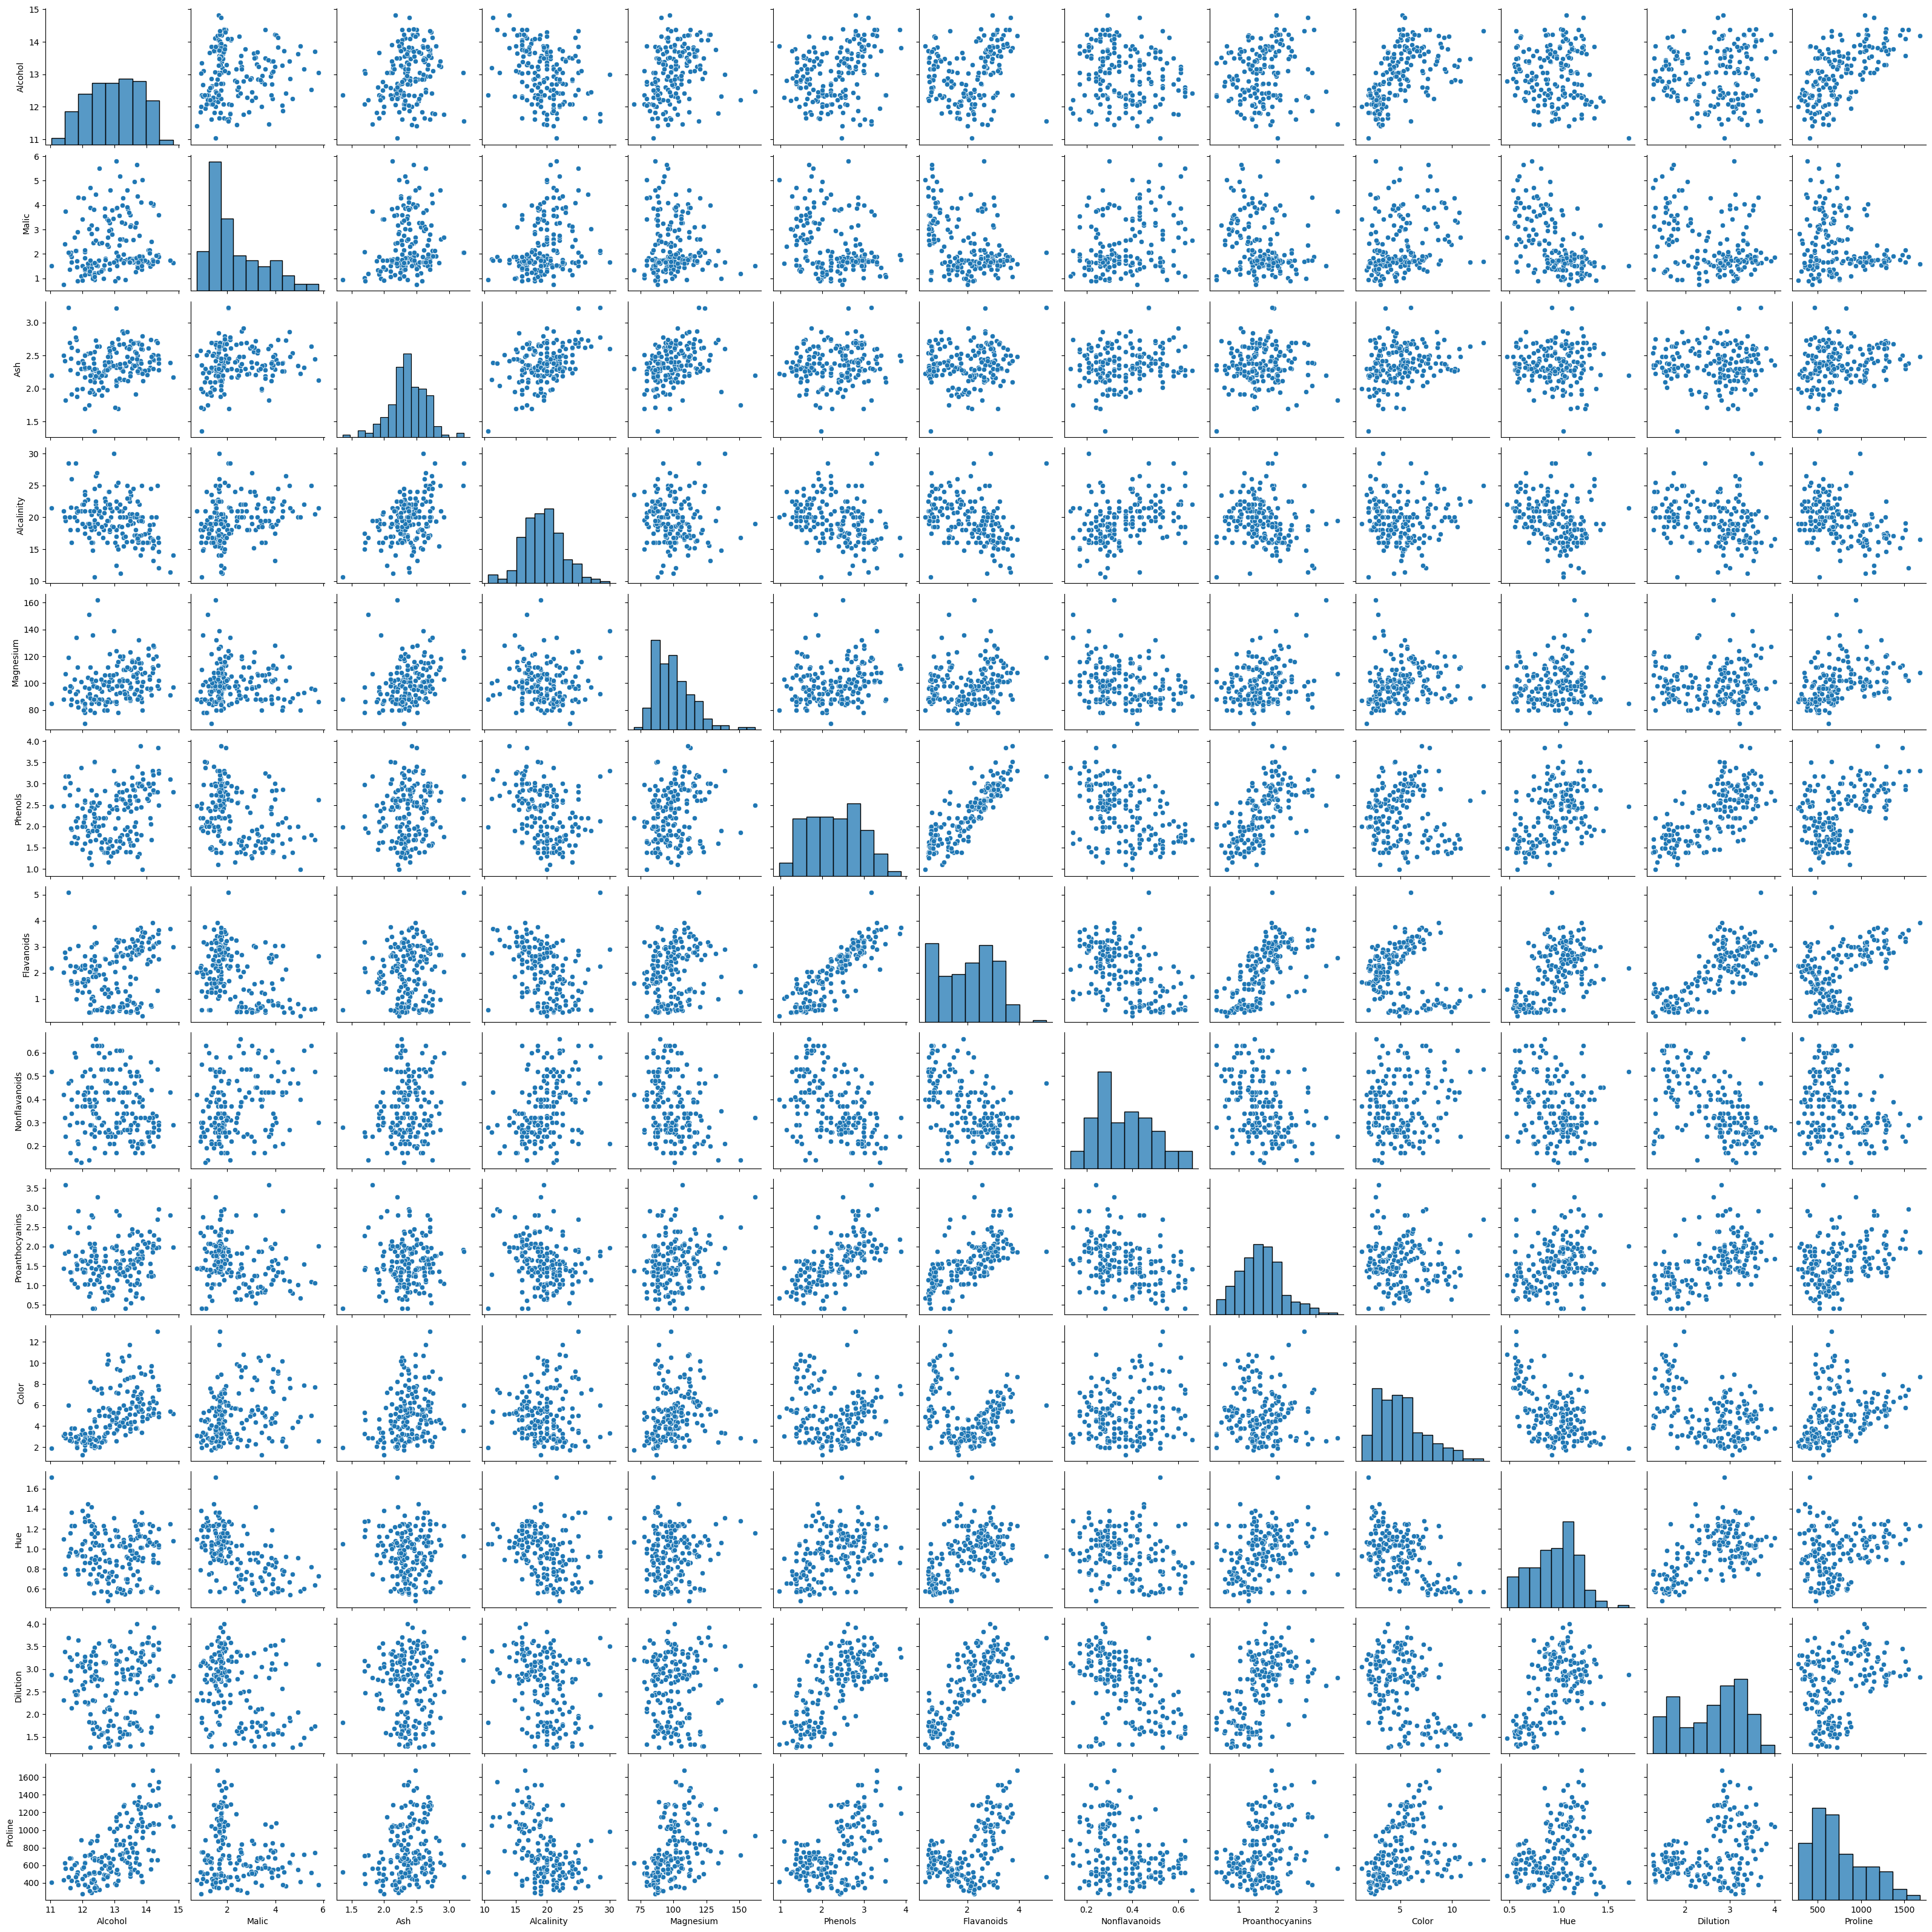

In [27]:
#checking relationship between variables by pairplot 
sn.pairplot(df1)

In [20]:
#checking with correlation matrix 
df1.corr()

Alcohol     Malic       Ash  Alcalinity  Magnesium  \
Alcohol          1.000000  0.094397  0.211545   -0.310235   0.270798   
Malic            0.094397  1.000000  0.164045    0.288500  -0.054575   
Ash              0.211545  0.164045  1.000000    0.443367   0.286587   
Alcalinity      -0.310235  0.288500  0.443367    1.000000  -0.083333   
Magnesium        0.270798 -0.054575  0.286587   -0.083333   1.000000   
Phenols          0.289101 -0.335167  0.128980   -0.321113   0.214401   
Flavanoids       0.236815 -0.411007  0.115077   -0.351370   0.195784   
Nonflavanoids   -0.155929  0.292977  0.186230    0.361922  -0.256294   
Proanthocyanins  0.136698 -0.220746  0.009652   -0.197327   0.236441   
Color            0.546364  0.248985  0.258887    0.018732   0.199950   
Hue             -0.071747 -0.561296 -0.074667   -0.273955   0.055398   
Dilution         0.072343 -0.368710  0.003911   -0.276769   0.066004   
Proline          0.643720 -0.192011  0.223626   -0.440597   0.393351   

                  Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  \
Alcohol          0.289101    0.236815      -0.155929         0.136698   
Malic           -0.335167   -0.411007       0.292977        -0.220746   
Ash              0.128980    0.115077       0.186230         0.009652   
Alcalinity      -0.321113   -0.351370       0.361922        -0.197327   
Magnesium        0.214401    0.195784      -0.256294         0.236441   
Phenols          1.000000    0.864564      -0.449935         0.612413   
Flavanoids       0.864564    1.000000      -0.537900         0.652692   
Nonflavanoids   -0.449935   -0.537900       1.000000        -0.365845   
Proanthocyanins  0.612413    0.652692      -0.365845         1.000000   
Color           -0.055136   -0.172379       0.139057        -0.025250   
Hue              0.433681    0.543479      -0.262640         0.295544   
Dilution         0.699949    0.787194      -0.503270         0.519067   
Proline          0.498115    0.494193      -0.311385         0.330417   

                    Color       Hue  Dilution   Proline  
Alcohol          0.546364 -0.071747  0.072343  0.643720  
Malic            0.248985 -0.561296 -0.368710 -0.192011  
Ash              0.258887 -0.074667  0.003911  0.223626  
Alcalinity       0.018732 -0.273955 -0.276769 -0.440597  
Magnesium        0.199950  0.055398  0.066004  0.393351  
Phenols         -0.055136  0.433681  0.699949  0.498115  
Flavanoids      -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids    0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins -0.025250  0.295544  0.519067  0.330417  
Color            1.000000 -0.521813 -0.428815  0.316100  
Hue             -0.521813  1.000000  0.565468  0.236183  
Dilution        -0.428815  0.565468  1.000000  0.312761  
Proline          0.316100  0.236183  0.312761  1.000000

<AxesSubplot:>

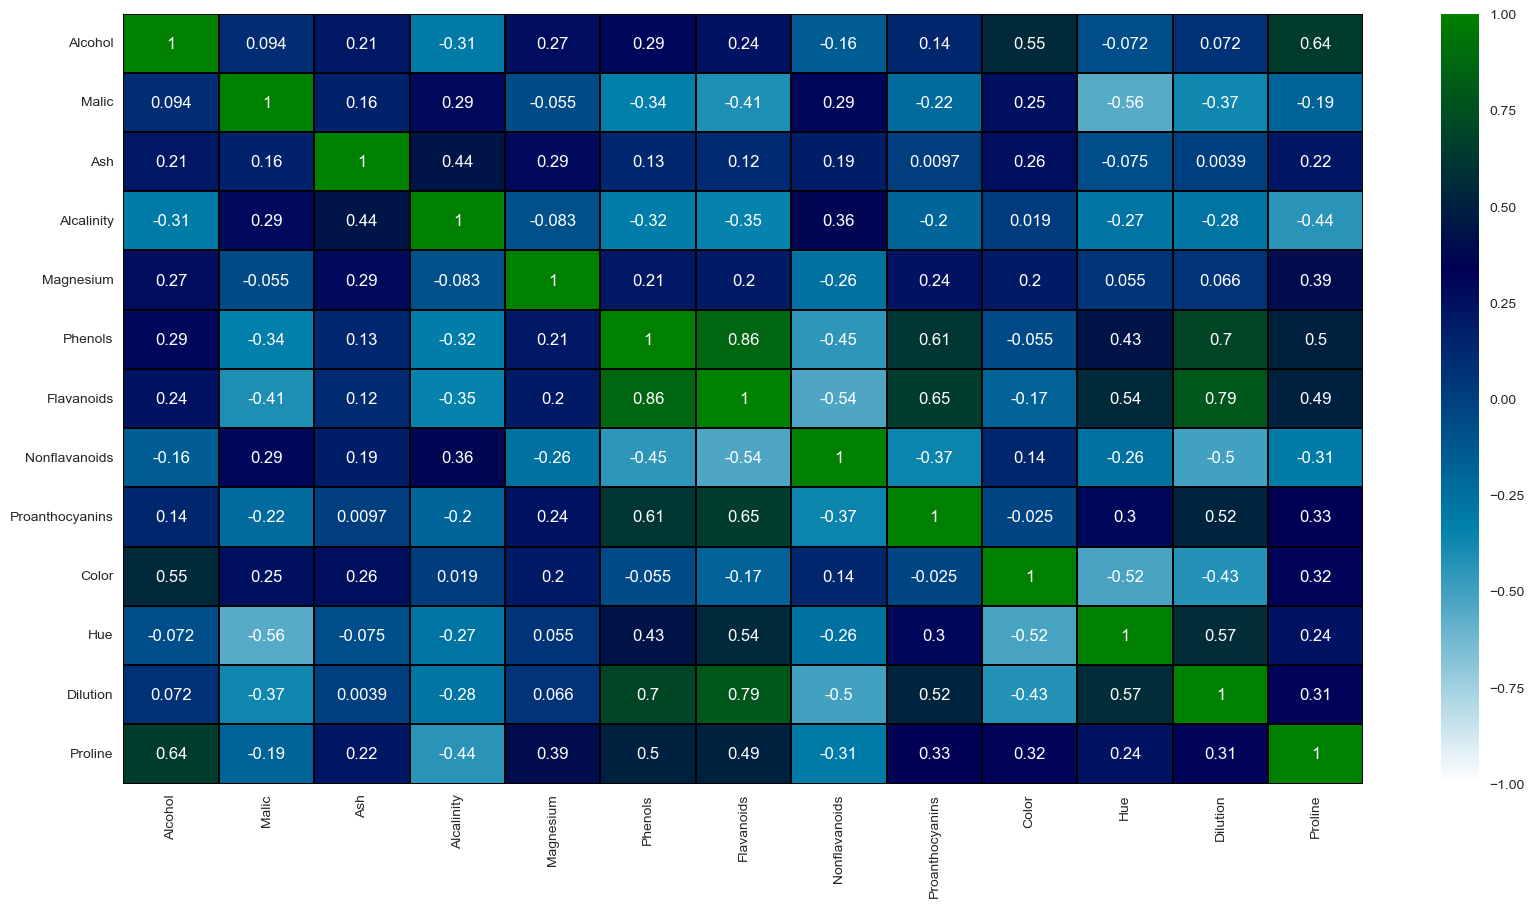

In [21]:
#plotting heatmap with correlation matrix 
corr = df1.corr()
top_features = corr.index
plt.figure(figsize=(20,10))
sn.heatmap(df1[top_features].corr(),annot = True,linecolor='black',cbar='blue',linewidths=0.2,cmap='ocean_r',
          vmax=1,vmin=-1)

1)We observe that phenols are positively correlated to flavanoids

2)We observe that phenols are positively correlated to dilution 

3)We observe that dilution are positively correlated to phenols and flavanoids

4)We observe that proline has positive correlation with Alchohol



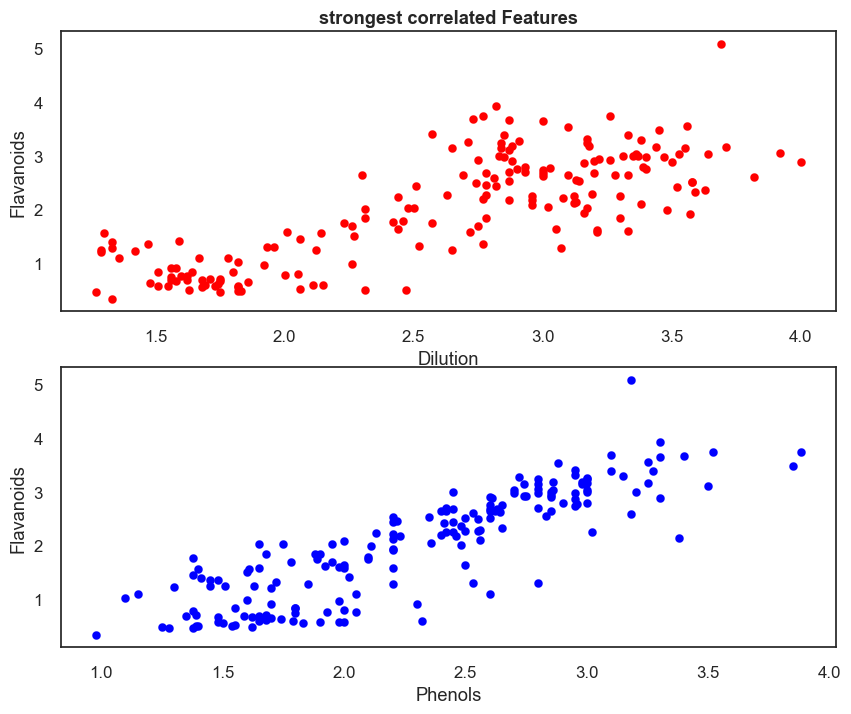

In [22]:
#plotting with most correlation phenols and flavanoids 
sn.set(style = 'white',rc = {'figure.figsize':(10,8)},font_scale=1.1)
plt.subplot(211)
plt.scatter(x=df1['Dilution'],y=df1['Flavanoids'],color='red',lw=0.1)
plt.xlabel('Dilution')
plt.ylabel('Flavanoids')
plt.title('strongest correlated Features',fontweight='bold')
plt.subplot(212)
plt.scatter(x=df1['Phenols'],y=df1['Flavanoids'],color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')

plt.show()

In [23]:
#Feature scaling for all of our features 
std = StandardScaler()
df_scaled = std.fit_transform(df1)

In [24]:
df_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [25]:
#fitting our pca on our scaled data 
pca = PCA(n_components=13)
pca_components = pd.DataFrame(pca.fit_transform(df_scaled),columns=['pc1','pc2','pc3','pc4','pc5',
                                                                   'pc6','pc7','pc8','pc9','pc10','pc12','pc13','pc14'])
pca_components

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

          pc8       pc9      pc10      pc12      pc13      pc14  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
..        ...       ...       ...       ...       ...       ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965  

[178 rows x 13 columns]

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

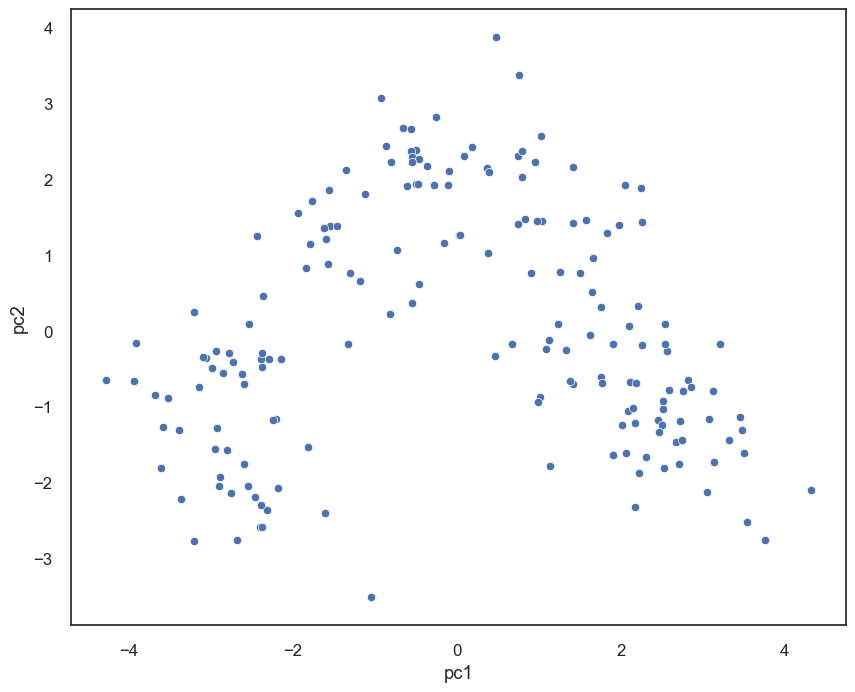

In [26]:
#plotting scatter plot 
sn.scatterplot(x=pca_components.pc1,y=pca_components.pc2,palette='dark')

In [27]:
#checking with explained variance for our columns 
var = (pca.explained_variance_ratio_)
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [28]:
#checking with cumulative variance 
cum_var = pd.DataFrame(np.cumsum(np.round(var,decimals=2)*100))
cum_var

0
0    36.0
1    55.0
2    66.0
3    73.0
4    80.0
5    85.0
6    89.0
7    92.0
8    94.0
9    96.0
10   98.0
11   99.0
12  100.0

Text(0.5, 1.0, 'Explained variance by each component')

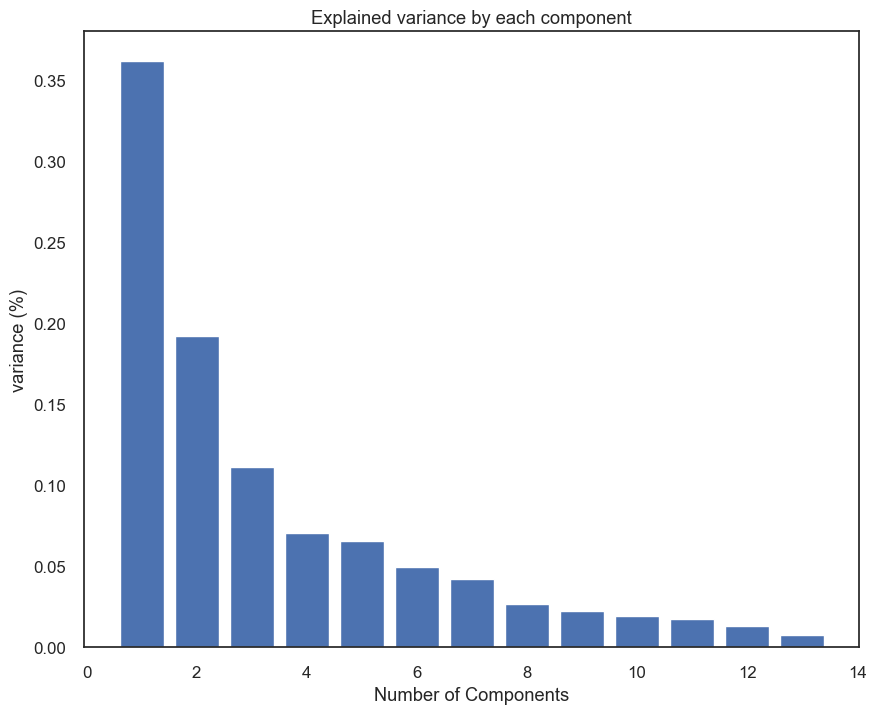

In [29]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

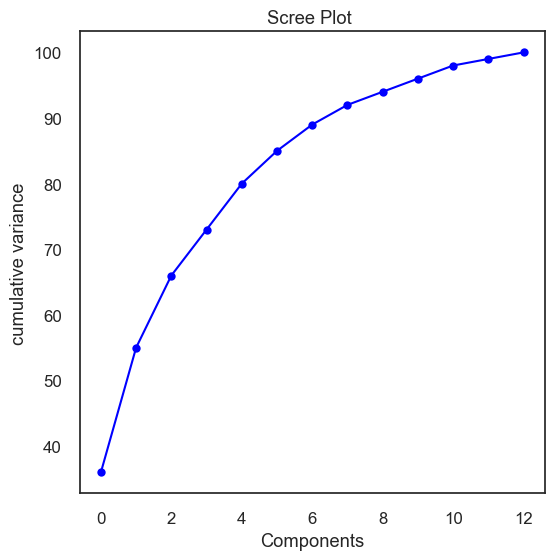

In [30]:
#plotting scree plot 
plt.figure(figsize=(6,6))
plt.plot(cum_var,color = 'blue',marker = 'o')
plt.title('Scree Plot ')
plt.xlabel('Components')
plt.ylabel('cumulative variance')
plt.show()


We can observe that with 7 components we are getting a good cumulative variance of 94%

In [31]:
#selecting our top 8 columns 
#fitting our pca on our scaled data 
pca_2 = PCA(n_components=7)
pca_final = pd.DataFrame(pca_2.fit_transform(df_scaled),columns=['pc1','pc2','pc3','pc4','pc5',
                                                                   'pc6','pc7'])
pca_final

pc1       pc2       pc3       pc4       pc5       pc6       pc7
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074
..        ...       ...       ...       ...       ...       ...       ...
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741

[178 rows x 7 columns]

## Clustering with KMeans using Standard scalar

In [32]:
n_clusters = [2,3,4,5]
clusters_inertia = []
s_scores = []

In [33]:
for n in n_clusters:
    kmeans = KMeans(n_clusters=n,init='k-means++').fit(pca_final)
    clusters_inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(pca_final,kmeans.labels_)
    s_scores.append(silhouette_avg)

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


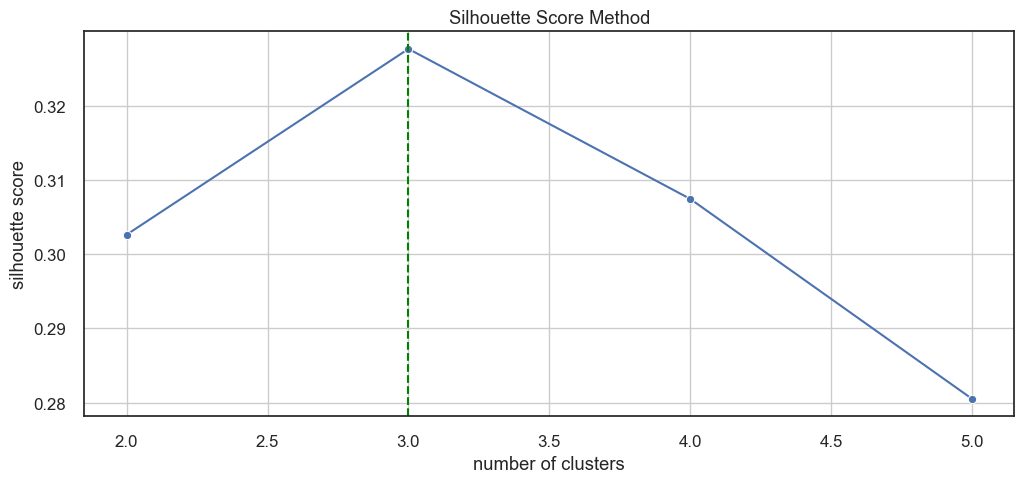

In [34]:
fig,ax = plt.subplots(figsize=(12,5))
ax = sn.lineplot(n_clusters,s_scores,marker='o',ax=ax)
ax.set_title('Silhouette Score Method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('silhouette score')
ax.axvline(3,ls="--",c='green')
plt.grid()
plt.show()

The elbow graph clearly indicates us optimal number of clusters would be 3 

Elbow plot for PCA Data


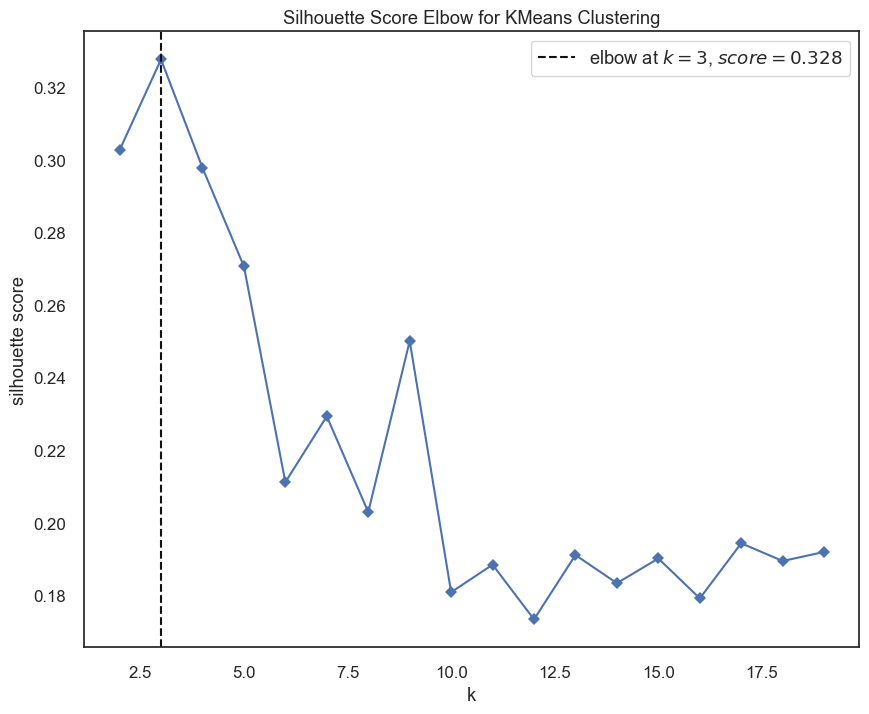

In [35]:
#visualizing silhouette score with Kelbow visualizer 
model = KMeans(random_state=10,max_iter=500,init='k-means++')
visualizer = KElbowVisualizer(model,k=(2,20),metric='silhouette',timings=False)
print('Elbow plot for PCA Data')
visualizer.fit(pca_final)
visualizer.show()
plt.show()

In [36]:
#alternative method 
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_final)
    sil_score1= silhouette_score(pca_final, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3026287263777471
For n_clusters = 3 The average silhouette_score is : 0.3276351722402824
For n_clusters = 4 The average silhouette_score is : 0.28347690904854134
For n_clusters = 5 The average silhouette_score is : 0.3021803467562518
For n_clusters = 6 The average silhouette_score is : 0.2691851823319872
For n_clusters = 7 The average silhouette_score is : 0.19196827283789947
For n_clusters = 8 The average silhouette_score is : 0.16906580094673318
For n_clusters = 9 The average silhouette_score is : 0.20938136071947747


For n_clusters = 2 The average silhouette_score is : 0.3026287263777471
For n_clusters = 3 The average silhouette_score is : 0.3276351722402824
For n_clusters = 4 The average silhouette_score is : 0.28347690904854134
For n_clusters = 5 The average silhouette_score is : 0.3021803467562518
For n_clusters = 6 The average silhouette_score is : 0.2691851823319872
For n_clusters = 7 The average silhouette_score is : 0.19196827283789947
For n_clusters = 8 The average silhouette_score is : 0.16906580094673318
For n_clusters = 9 The average silhouette_score is : 0.20938136071947747


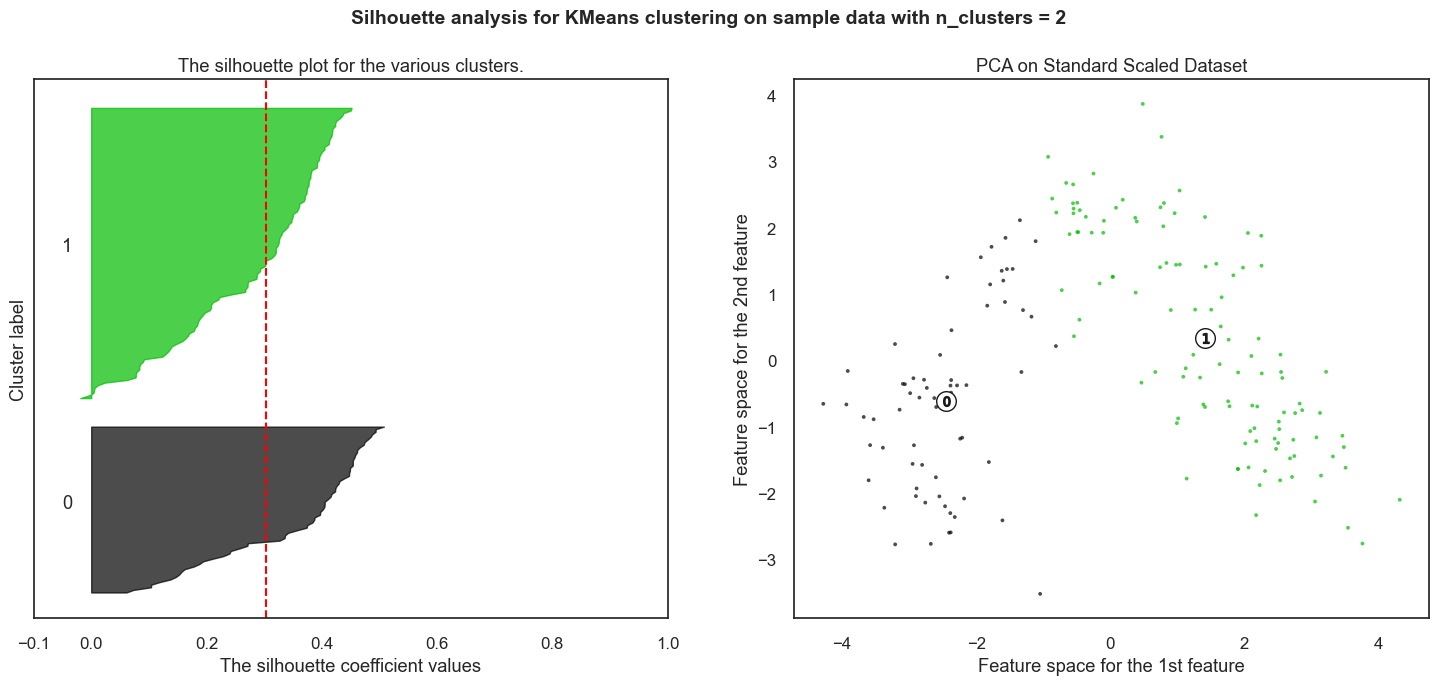

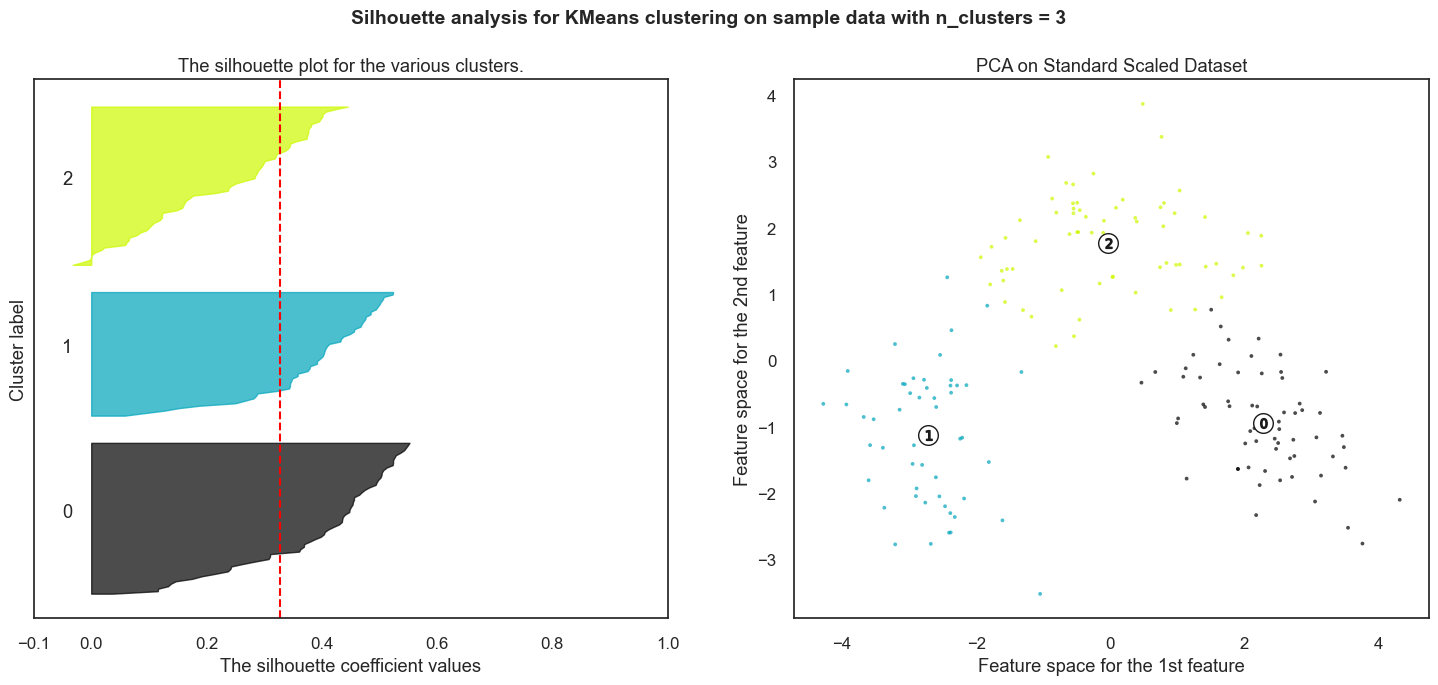

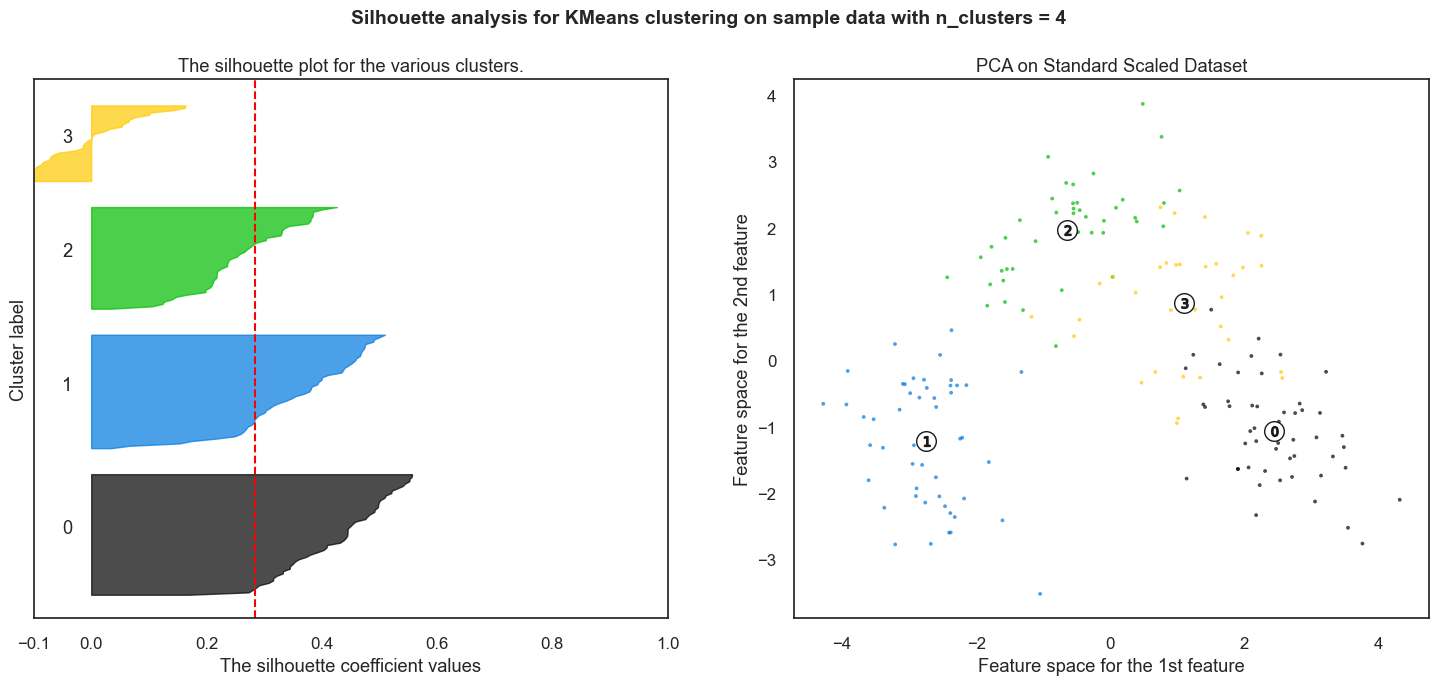

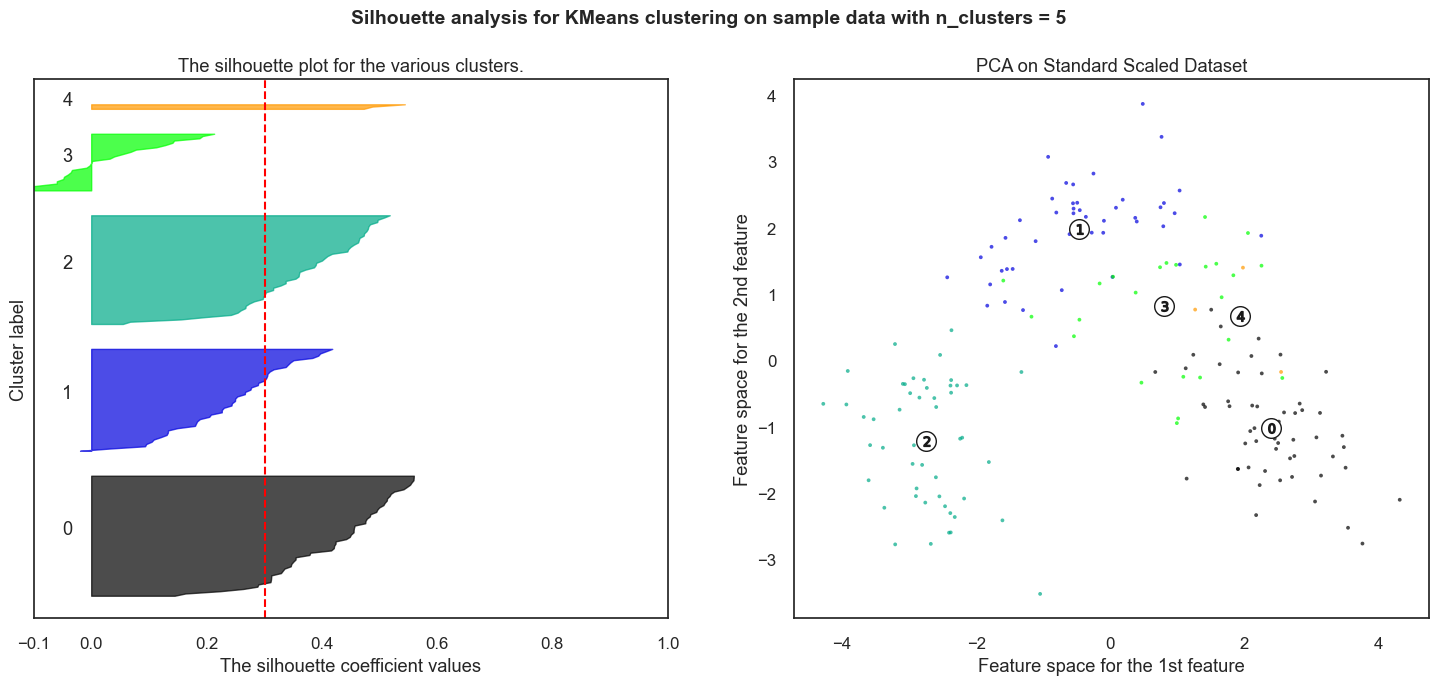

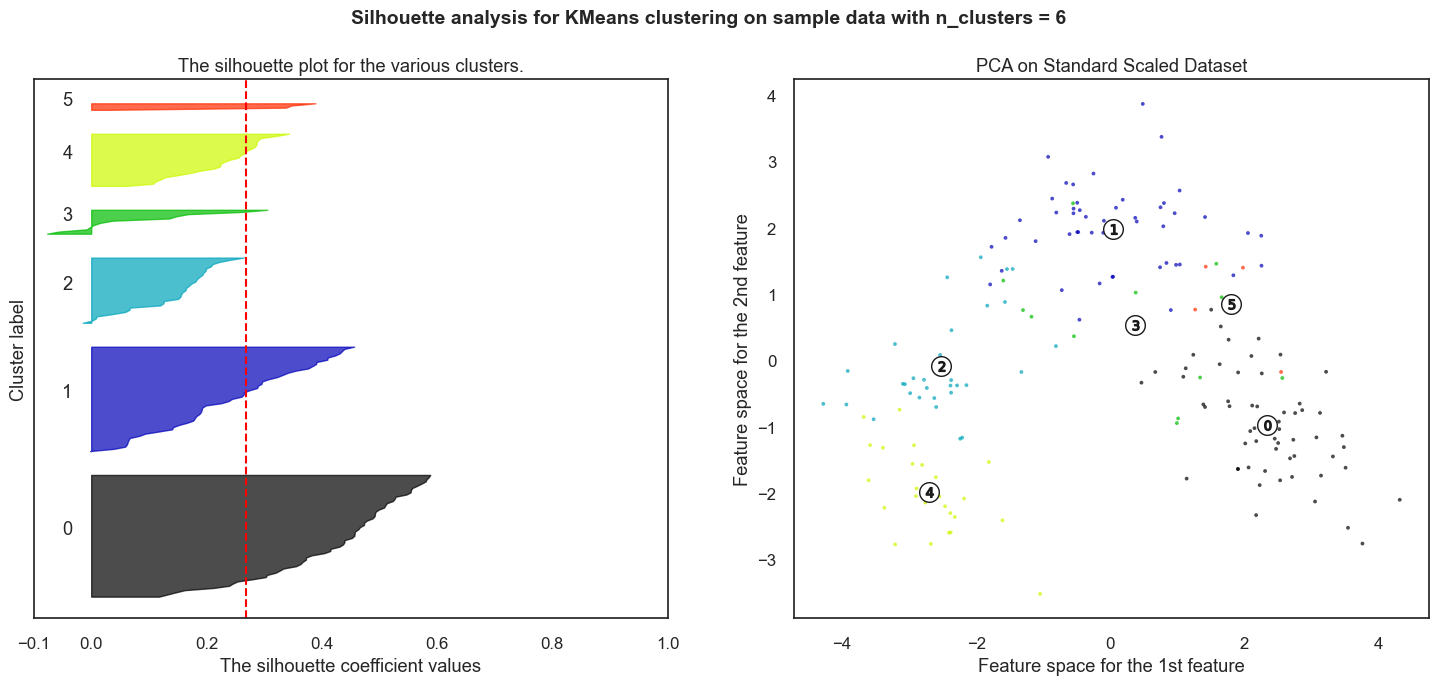

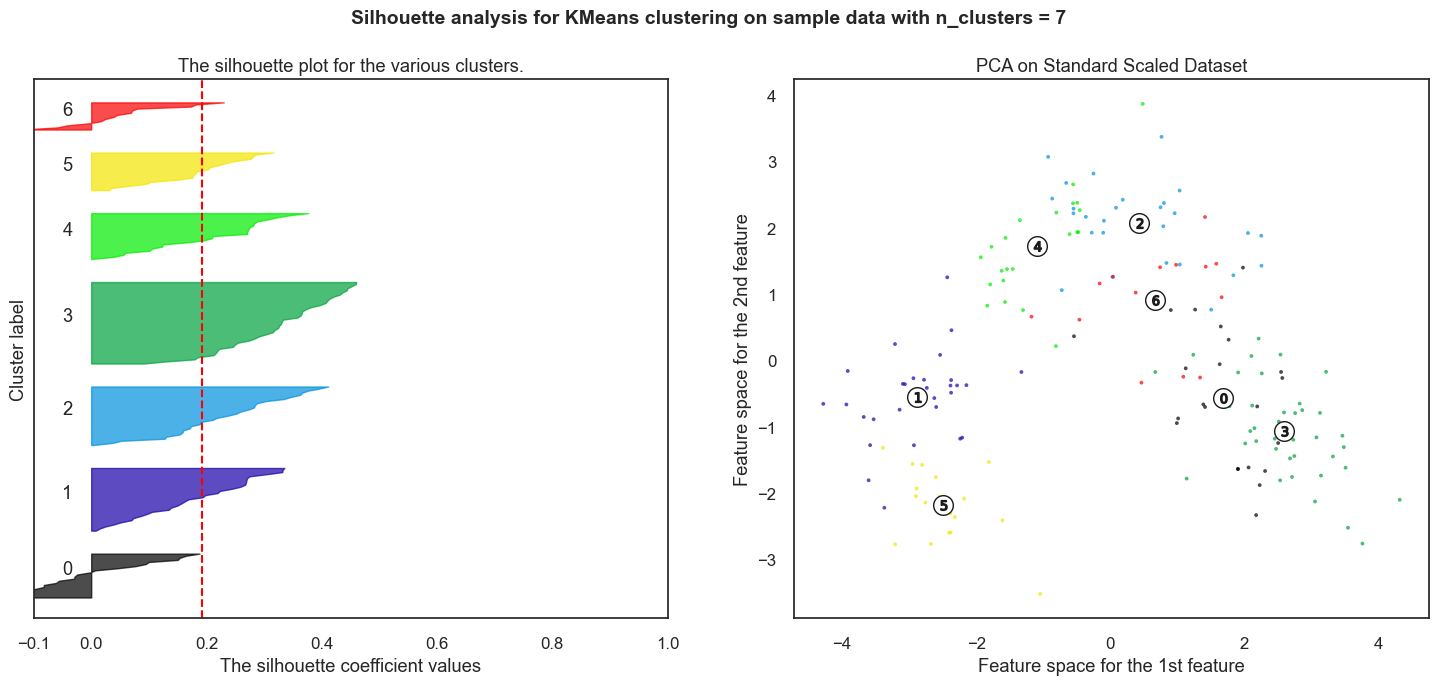

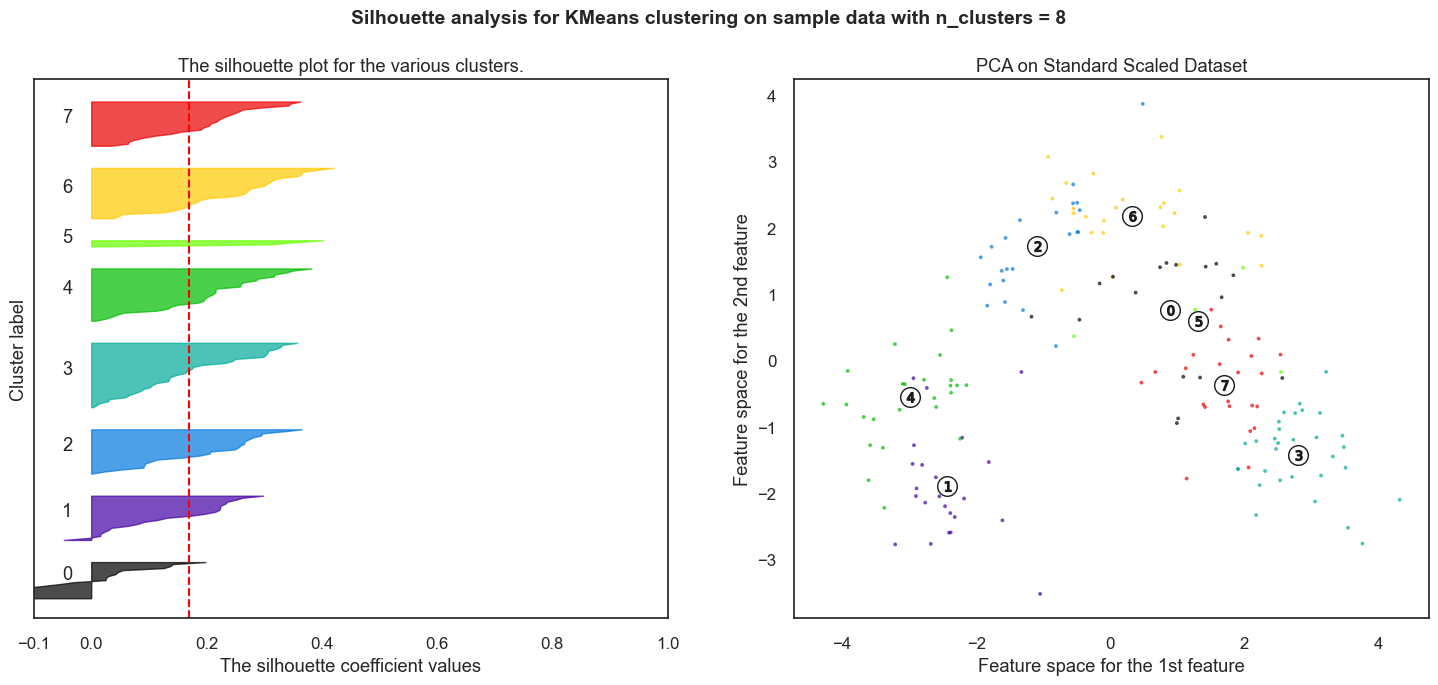

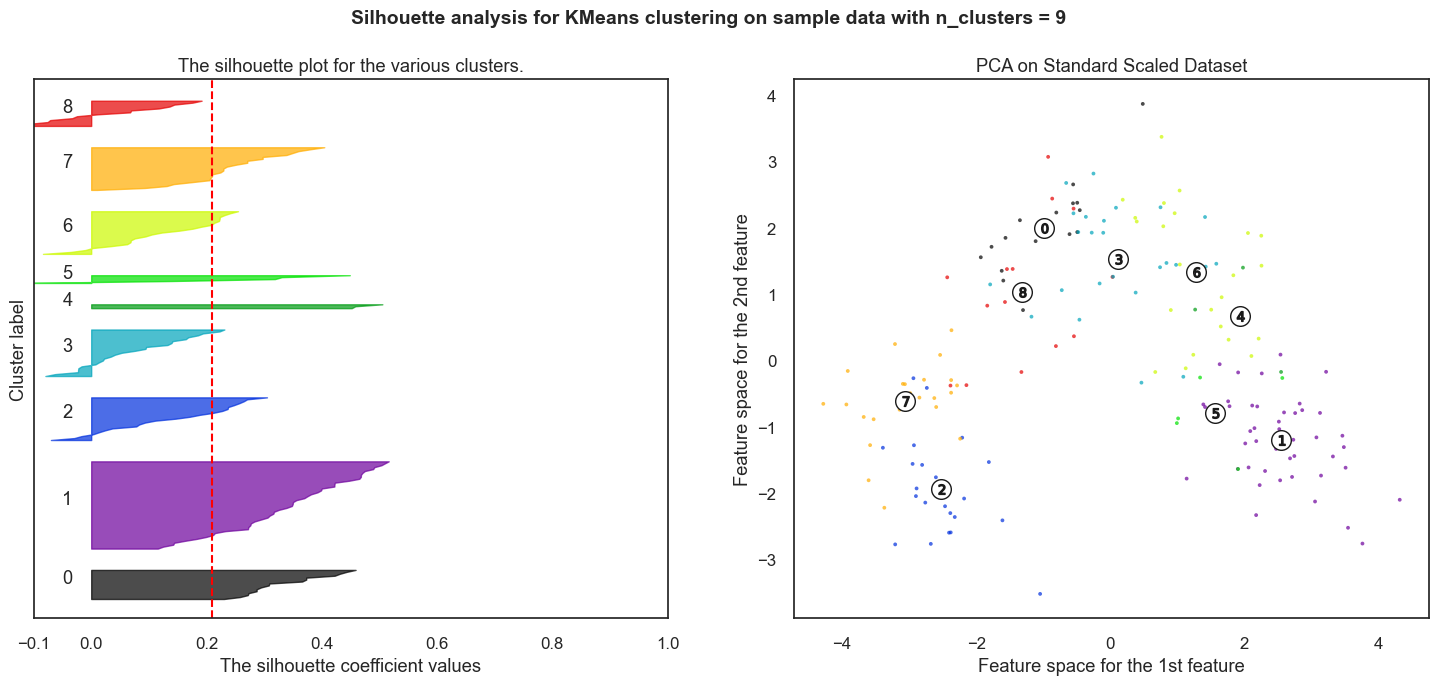

In [37]:
#using sklearn library  for kmeans clustering 
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_final) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pca_final)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_final, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_final, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_final.iloc[:,0], pca_final.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("PCA on Standard Scaled Dataset")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Building KMeans algorithm with clusters = 3

In [38]:
model_kmeans = KMeans(n_clusters=3,random_state=0,init='k-means++')
kmean_pred = model_kmeans.fit_predict(pca_final)
kmean_pred.shape

(178,)

In [39]:
#checking with our cluster labels 
model_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [40]:
#checking with centroids of labels 
model_kmeans.cluster_centers_

array([[ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01, -2.18283242e-01,
         5.21099249e-02],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02,  9.99252193e-02,
        -6.03831729e-02],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02,  1.29805766e-01,
        -2.32728507e-03]])

In [41]:
#checking wiht inertia the lower the inertia denser the clusters
model_kmeans.inertia_

1032.4055597618133

In [42]:
df['Kmeans_label_std'] = model_kmeans.labels_

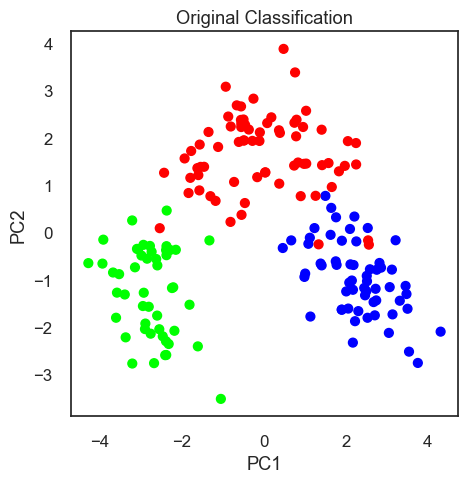

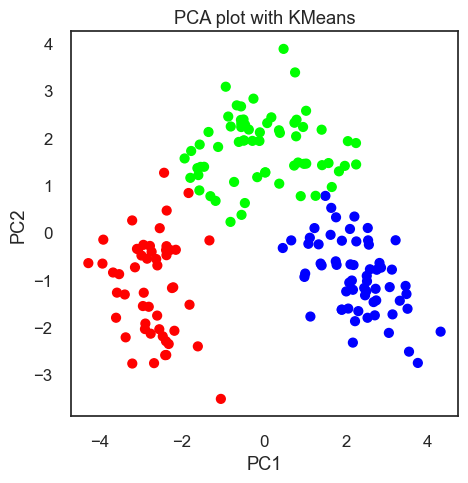

In [43]:
#plotting with original and after application of pca
# Scatterplot
plt.figure(figsize=(5,5))
plt.scatter(pca_final.iloc[:,0], pca_final.iloc[:,1], c=df['Type'], cmap="brg", s=40)
plt.title('Original Classification')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


plt.figure(figsize=(5,5))
plt.scatter(pca_final.iloc[:,0], pca_final.iloc[:,1], c=df['Kmeans_label_std'], cmap="brg", s=40)
plt.title('PCA plot with KMeans on Standard scaler')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [44]:
# Group data by Clusters (K=3)
df.groupby('Kmeans_label_std').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity  \
                      mean       mean      mean      mean       mean   
Kmeans_label_std                                                       
0                 1.048387  13.676774  1.997903  2.466290  17.462903   
1                 2.941176  13.134118  3.307255  2.417647  21.241176   
2                 2.000000  12.250923  1.897385  2.231231  20.063077   

                   Magnesium   Phenols Flavanoids Nonflavanoids  \
                        mean      mean       mean          mean   
Kmeans_label_std                                                  
0                 107.967742  2.847581   3.003226      0.292097   
1                  98.666667  1.683922   0.818824      0.451961   
2                  92.738462  2.247692   2.050000      0.357692   

                 Proanthocyanins     Color       Hue  Dilution      Proline  
                            mean      mean      mean      mean         mean  
Kmeans_label_std                                                             
0                       1.922097  5.453548  1.065484  3.163387  1100.225806  
1                       1.145882  7.234706  0.691961  1.696667   619.058824  
2                       1.624154  2.973077  1.062708  2.803385   510.169231

## PCA and clustering with minmax scaler

In [47]:
df2 = df.copy()
df2.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   Kmeans_label_std  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [48]:
#dropping our first cluster column
df2.drop(['Kmeans_label_std'],axis=1,inplace=True)

In [49]:
df2.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [50]:
#transfroming our data using min max scalar
min_max = MinMaxScaler()
df_min_max = min_max.fit_transform(df2)

In [51]:
df_min_max

array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [54]:
#fitting our pca on our scaled data 
pca_min = PCA(n_components=13)
pca_components_min = pd.DataFrame(pca_min.fit_transform(df_min_max),columns=['pc1','pc2','pc3','pc4','pc5',
                                                                   'pc6','pc7','pc8','pc9','pc10','pc12','pc13','pc14'])
pca_components_min

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0   -0.847604 -0.243146  0.029752 -0.047430 -0.002728  0.038810  0.049146   
1   -0.678651 -0.005712 -0.283970  0.001458 -0.248171 -0.026104 -0.013032   
2   -0.700372 -0.183868  0.197457  0.004297  0.049228 -0.044054  0.141187   
3   -0.936076 -0.566967  0.093919 -0.110809  0.092336 -0.106658 -0.071420   
4   -0.454077 -0.063348  0.286092  0.179782  0.008012  0.182285  0.067237   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.898916 -0.482112  0.203259  0.012476 -0.342452 -0.032776  0.066883   
174  0.785427 -0.353231  0.088418 -0.075360  0.008066  0.043131  0.044505   
175  0.820658 -0.552469 -0.020750 -0.166405 -0.015765  0.021907  0.193634   
176  0.777268 -0.430255 -0.095511  0.051361  0.215166 -0.044780  0.161557   
177  0.875875 -0.521834  0.287457  0.100805  0.032272 -0.100743 -0.109933   

          pc8       pc9      pc10      pc12      pc13      pc14  
0    0.114127 -0.107955  0.291353  0.089500 -0.047503  0.045398  
1   -0.135043  0.082117  0.092704  0.098223 -0.078803  0.055369  
2   -0.086726 -0.167860 -0.148520 -0.030256 -0.035738  0.074816  
3   -0.093214  0.079009  0.026887  0.159666  0.118646 -0.000236  
4   -0.035410  0.058584  0.101458 -0.195057 -0.009654  0.009707  
..        ...       ...       ...       ...       ...       ...  
173  0.070463  0.060195 -0.048335  0.085700 -0.029515  0.008320  
174  0.067033 -0.006887 -0.092515  0.024457  0.062745 -0.004699  
175 -0.036957 -0.004505  0.051149  0.092752 -0.103362 -0.117647  
176 -0.064202 -0.063602  0.155148  0.105013 -0.013896 -0.032575  
177  0.121912  0.019911  0.033834 -0.075147  0.029919  0.004103  

[178 rows x 13 columns]

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

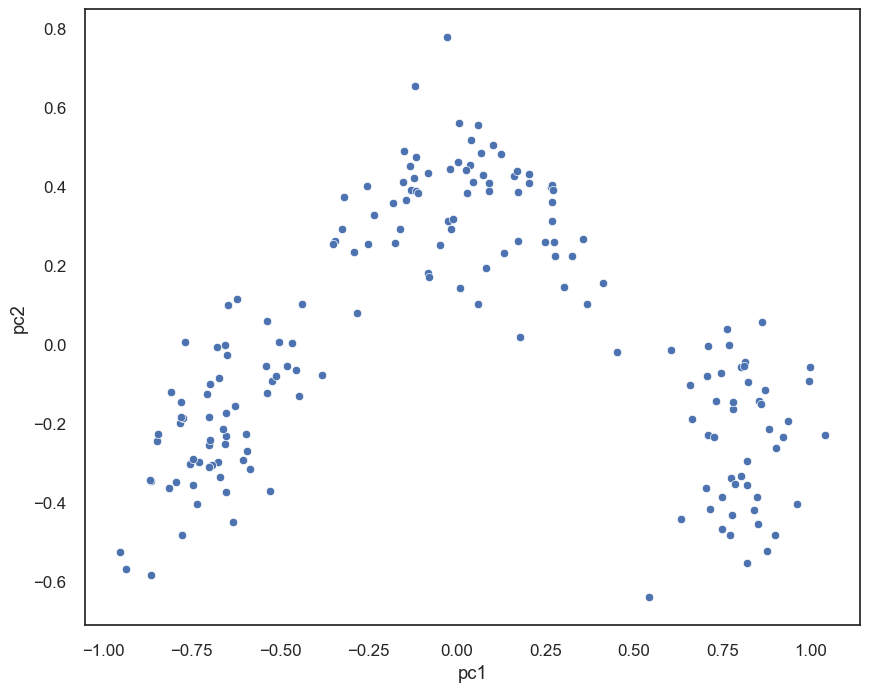

In [55]:
#plotting scatter plot 
sn.scatterplot(x=pca_components_min.pc1,y=pca_components_min.pc2,palette='dark')

In [57]:
#checking with explained variance for our columns 
var_min = (pca_min.explained_variance_ratio_)
var_min

array([0.51003634, 0.14853339, 0.06702619, 0.06257153, 0.05009893,
       0.03837954, 0.02882988, 0.01963591, 0.01828022, 0.01769633,
       0.01483498, 0.01075837, 0.00837412])

In [60]:
#checking with cumulative variance 
cum_var_min = pd.DataFrame(np.cumsum(np.round(var_min,decimals=2)*100))
cum_var_min

0
0    51.0
1    66.0
2    73.0
3    79.0
4    84.0
5    88.0
6    91.0
7    93.0
8    95.0
9    97.0
10   98.0
11   99.0
12  100.0

Text(0.5, 1.0, 'Explained variance by each component')

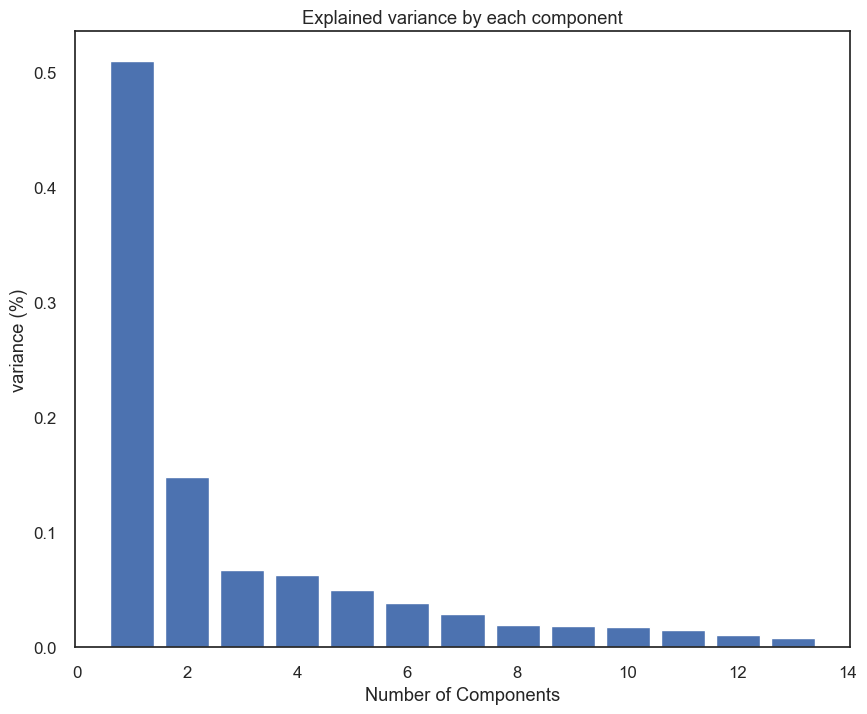

In [62]:
plt.bar(range(1, len(var_min)+1),var_min)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

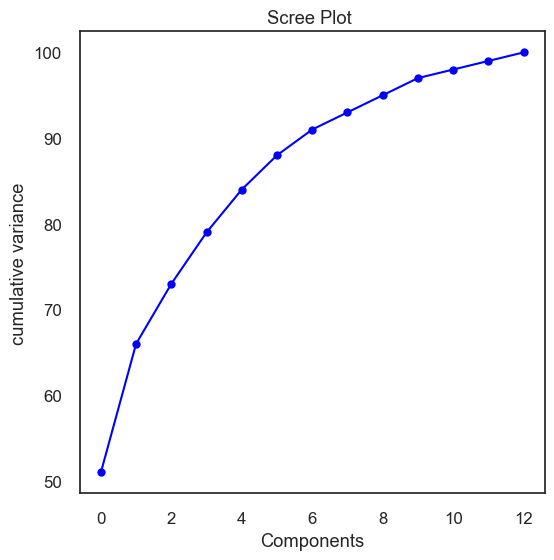

In [63]:
#plotting scree plot 
plt.figure(figsize=(6,6))
plt.plot(cum_var_min,color = 'blue',marker = 'o')
plt.title('Scree Plot ')
plt.xlabel('Components')
plt.ylabel('cumulative variance')
plt.show()


We can observe that compared to standard scalar we are able to capture much information above 50% with only 3 components 

In [69]:
#selecting our top 3 pca components 
pca_min_final = PCA(n_components=3)
pca_components_min_final = pd.DataFrame(pca_min_final.fit_transform(df_min_max),columns=['pc1','pc2','pc3'
                                                                  ])
pca_components_min_final

pc1       pc2       pc3
0   -0.847604 -0.243146  0.029752
1   -0.678651 -0.005712 -0.283970
2   -0.700372 -0.183868  0.197457
3   -0.936076 -0.566967  0.093919
4   -0.454077 -0.063348  0.286092
..        ...       ...       ...
173  0.898916 -0.482112  0.203259
174  0.785427 -0.353231  0.088418
175  0.820658 -0.552469 -0.020750
176  0.777268 -0.430255 -0.095511
177  0.875875 -0.521834  0.287457

[178 rows x 3 columns]

## clustering with KMeans for MinMax Scaler

In [70]:
n_clusters = [2,3,4,5]
clusters_inertia = []
s_scores = []

In [73]:
for n in n_clusters:
    kmeans = KMeans(n_clusters=n,init='k-means++').fit(pca_components_min_final)
    clusters_inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(pca_components_min_final,kmeans.labels_)
    s_scores.append(silhouette_avg)

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


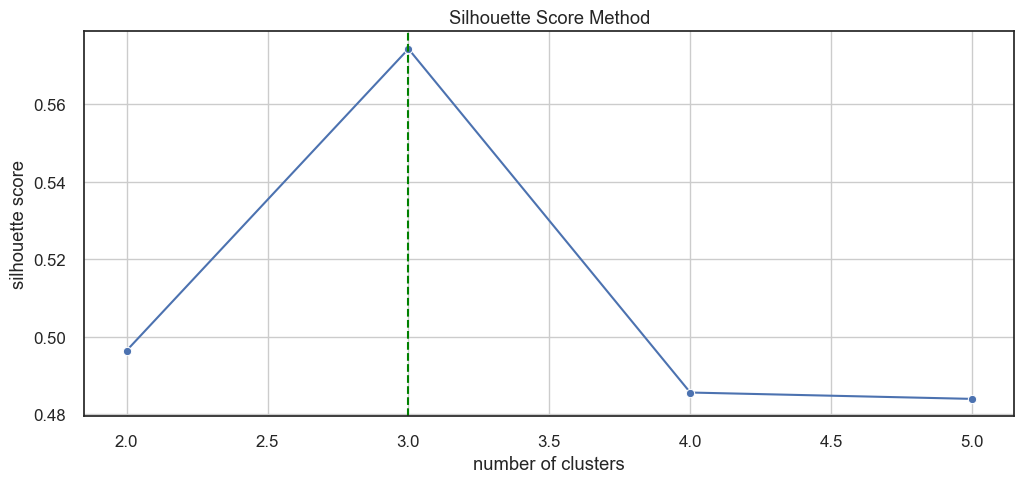

In [74]:
fig,ax = plt.subplots(figsize=(12,5))
ax = sn.lineplot(n_clusters,s_scores,marker='o',ax=ax)
ax.set_title('Silhouette Score Method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('silhouette score')
ax.axvline(3,ls="--",c='green')
plt.grid()
plt.show()

Elbow plot for PCA Data


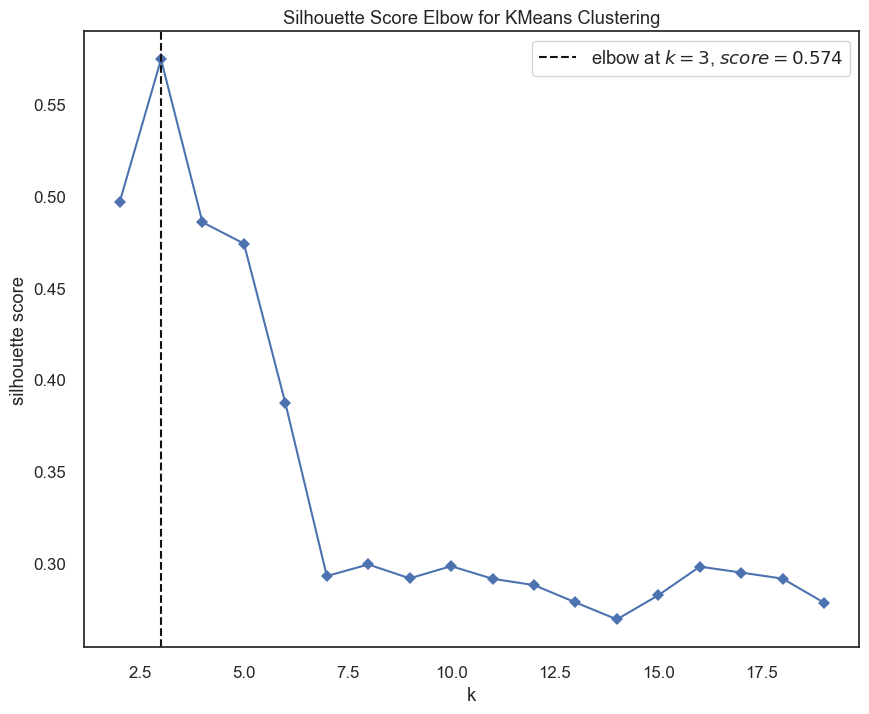

In [75]:
#visualizing silhouette score with Kelbow visualizer 
model_min = KMeans(random_state=10,max_iter=500,init='k-means++')
visualizer = KElbowVisualizer(model_min,k=(2,20),metric='silhouette',timings=False)
print('Elbow plot for PCA Data')
visualizer.fit(pca_components_min_final)
visualizer.show()
plt.show()

In [76]:
#alternative method 
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for minmax Scaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_components_min_final)
    sil_score1= silhouette_score(pca_components_min_final, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4964482877288064
For n_clusters = 3 The average silhouette_score is : 0.5742903318722891
For n_clusters = 4 The average silhouette_score is : 0.48561835974400647
For n_clusters = 5 The average silhouette_score is : 0.46953563378640967
For n_clusters = 6 The average silhouette_score is : 0.3704455035591312
For n_clusters = 7 The average silhouette_score is : 0.3180044216560208
For n_clusters = 8 The average silhouette_score is : 0.299769232627445
For n_clusters = 9 The average silhouette_score is : 0.3112885463091425


For n_clusters = 2 The average silhouette_score is : 0.4964482877288064
For n_clusters = 3 The average silhouette_score is : 0.5742903318722891
For n_clusters = 4 The average silhouette_score is : 0.48561835974400647
For n_clusters = 5 The average silhouette_score is : 0.46953563378640967
For n_clusters = 6 The average silhouette_score is : 0.3704455035591312
For n_clusters = 7 The average silhouette_score is : 0.3180044216560208
For n_clusters = 8 The average silhouette_score is : 0.299769232627445
For n_clusters = 9 The average silhouette_score is : 0.3112885463091425


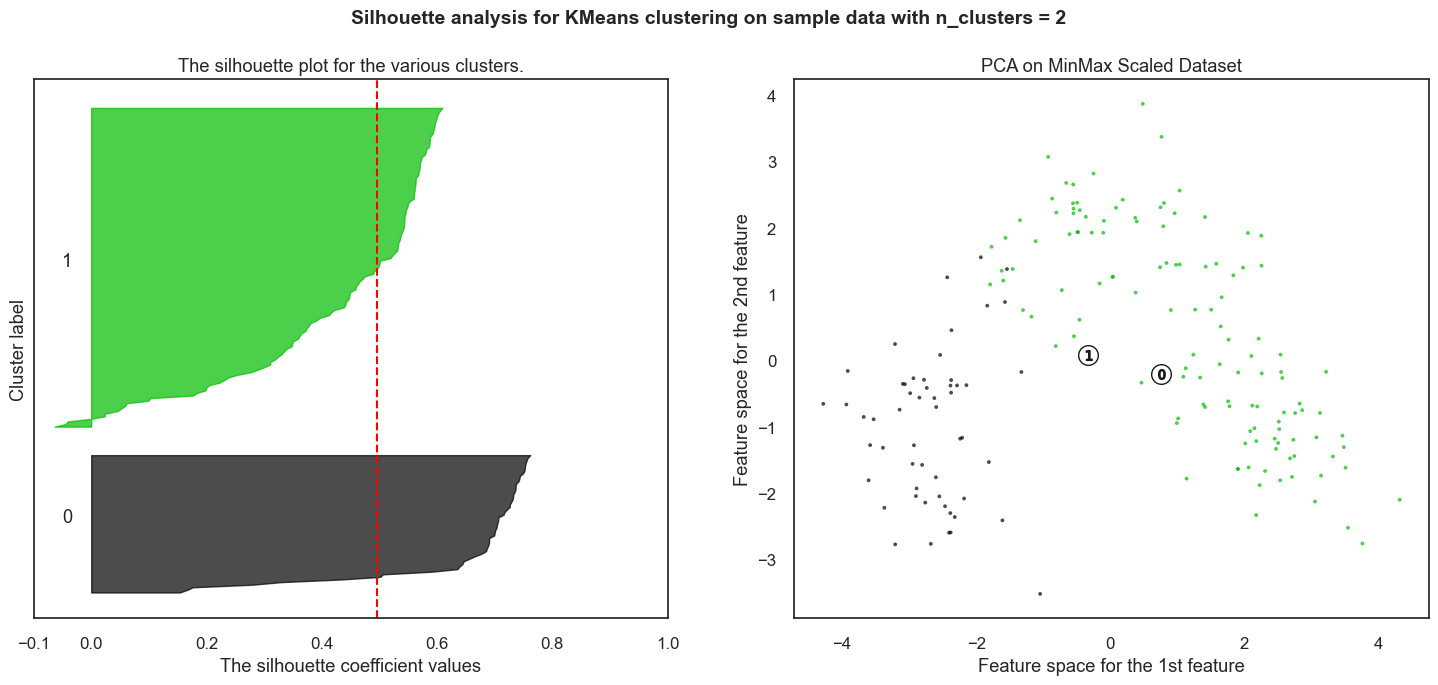

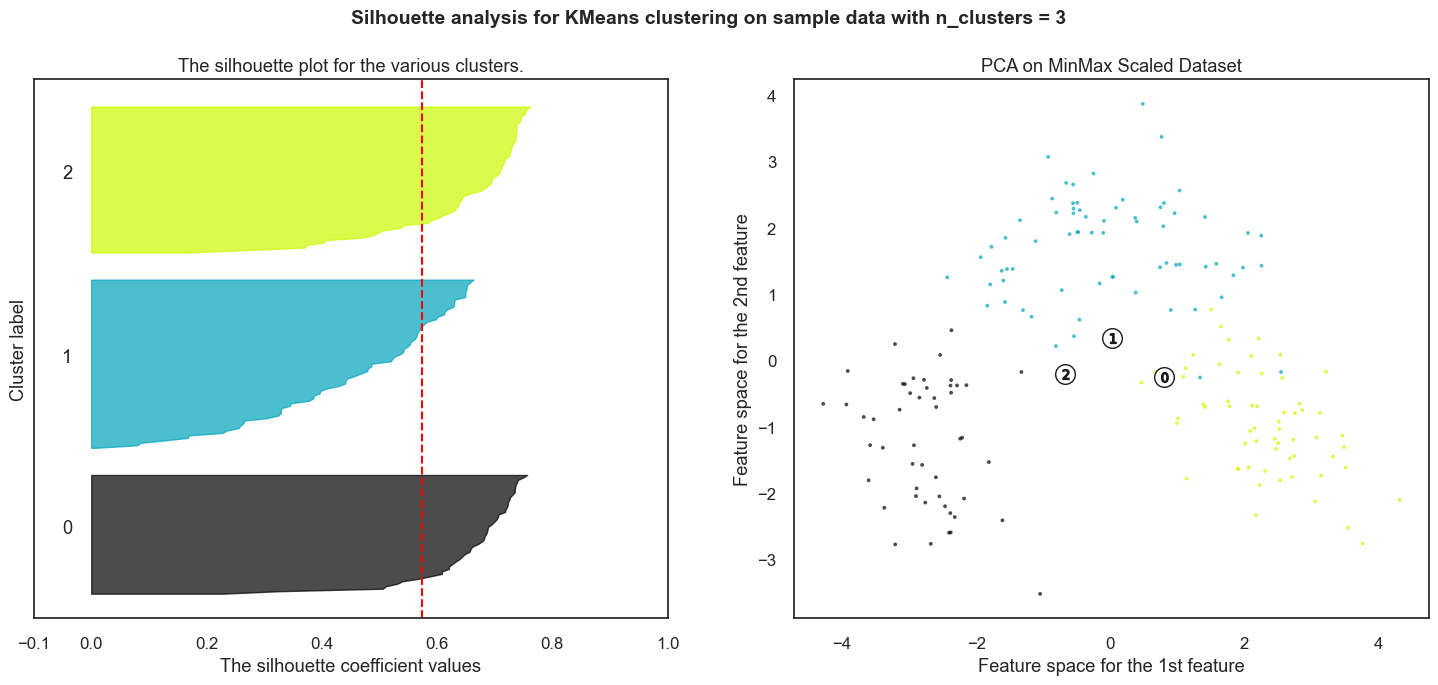

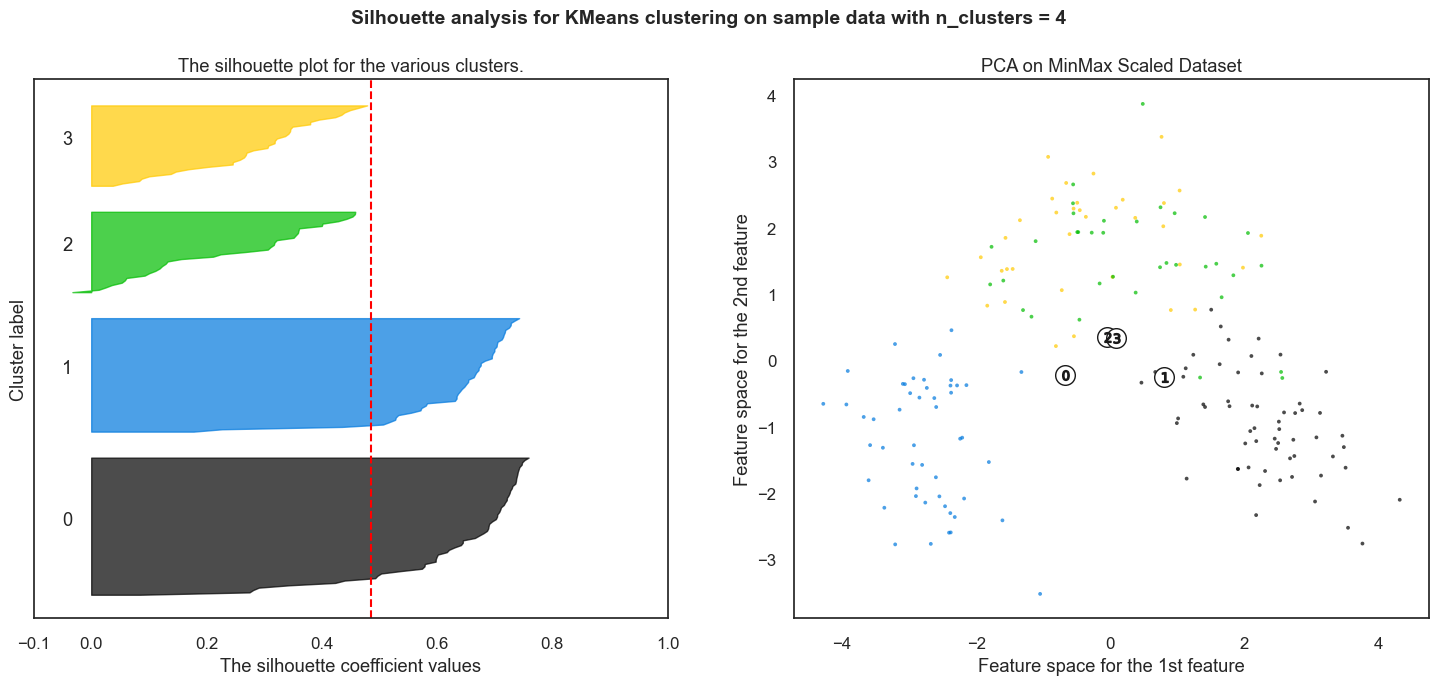

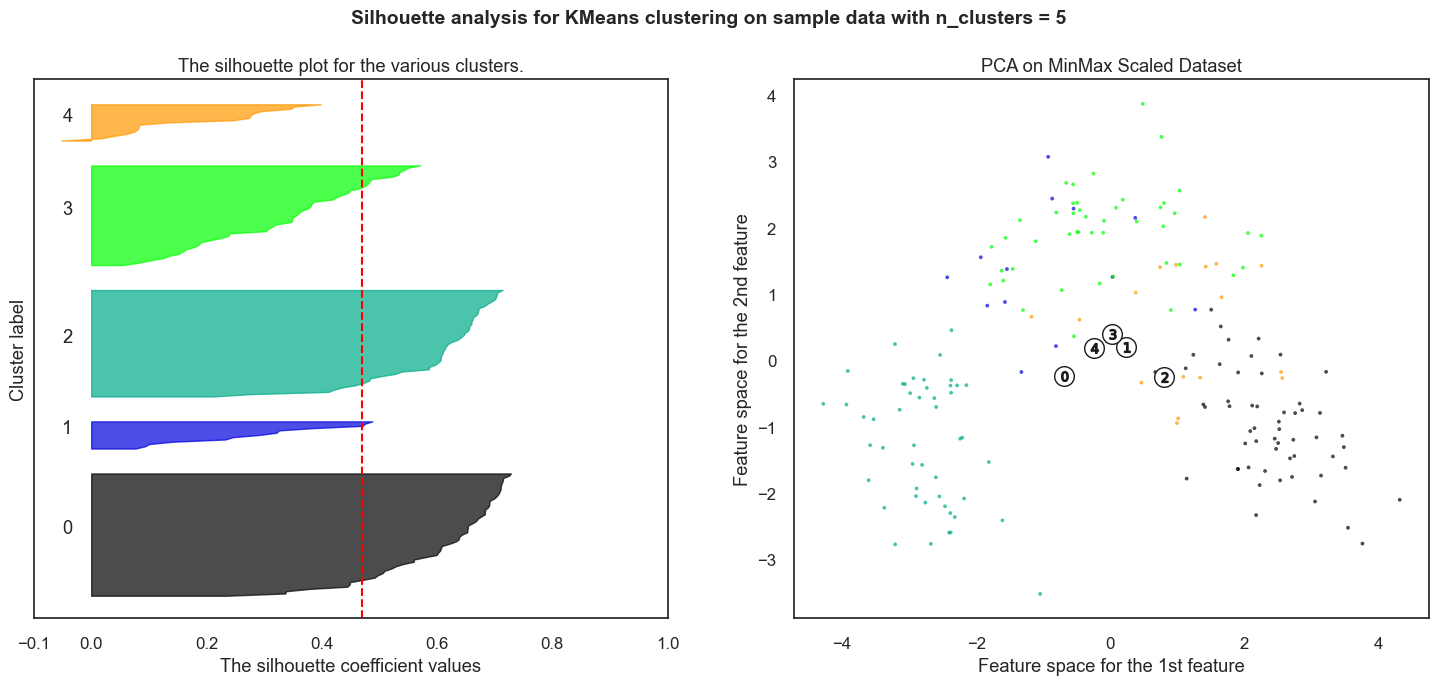

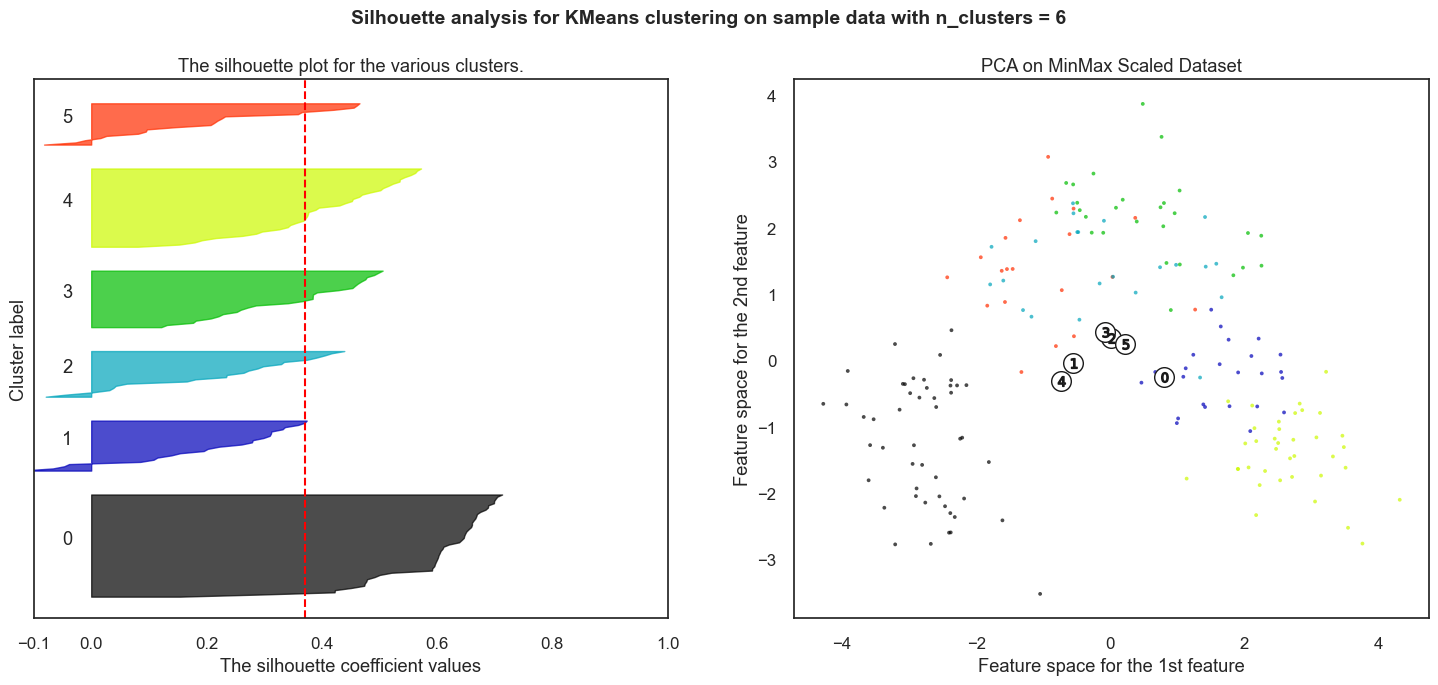

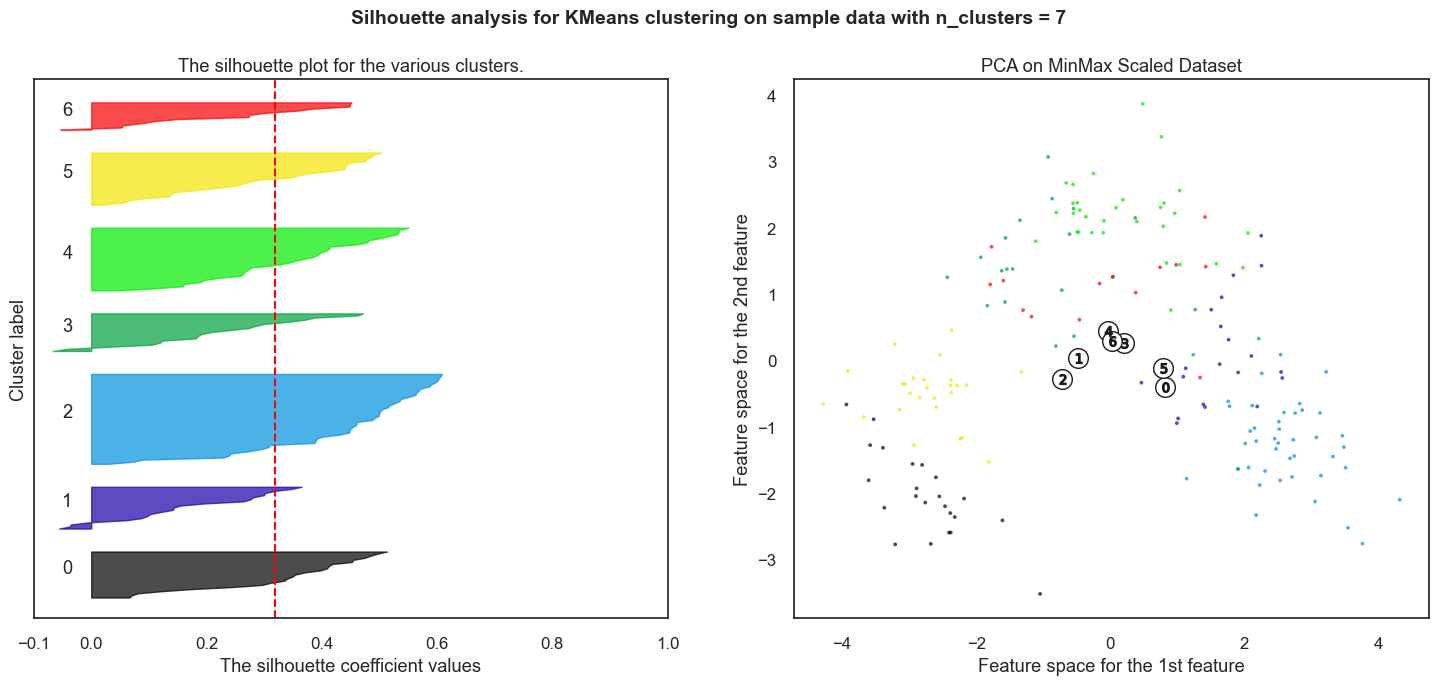

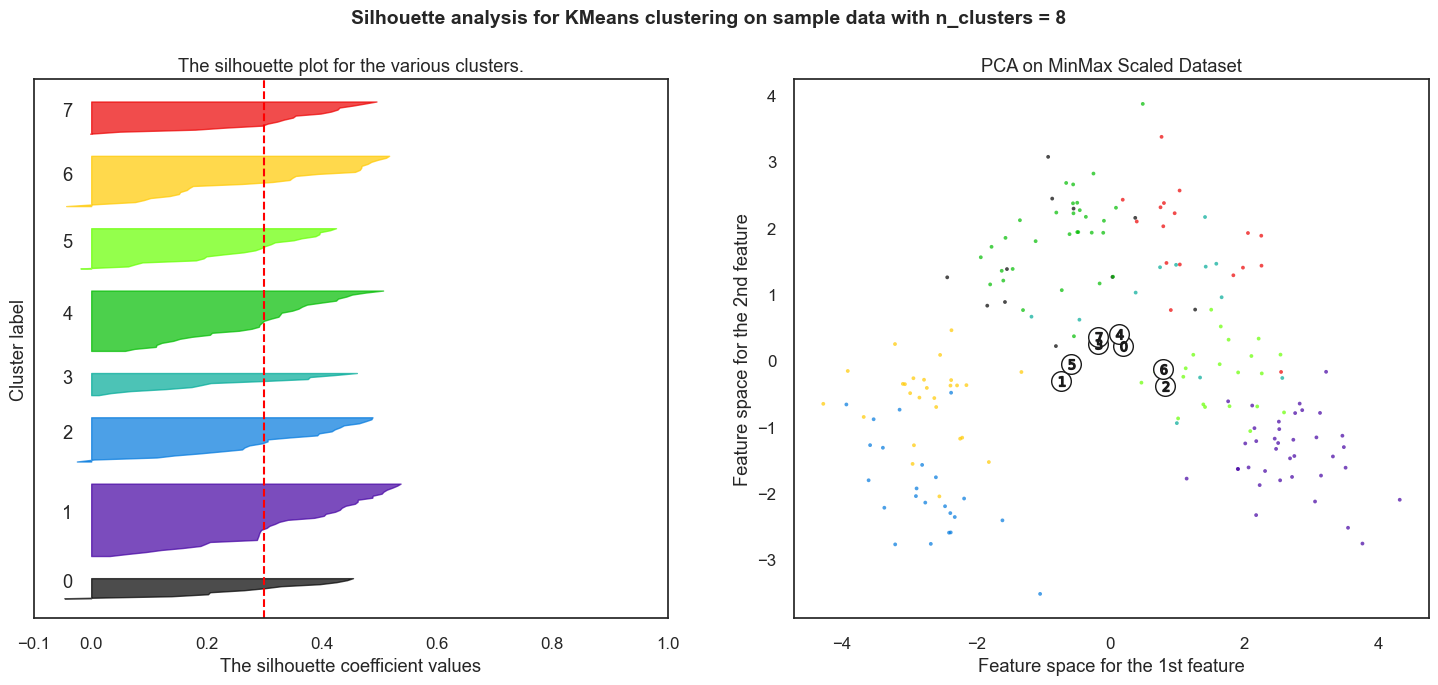

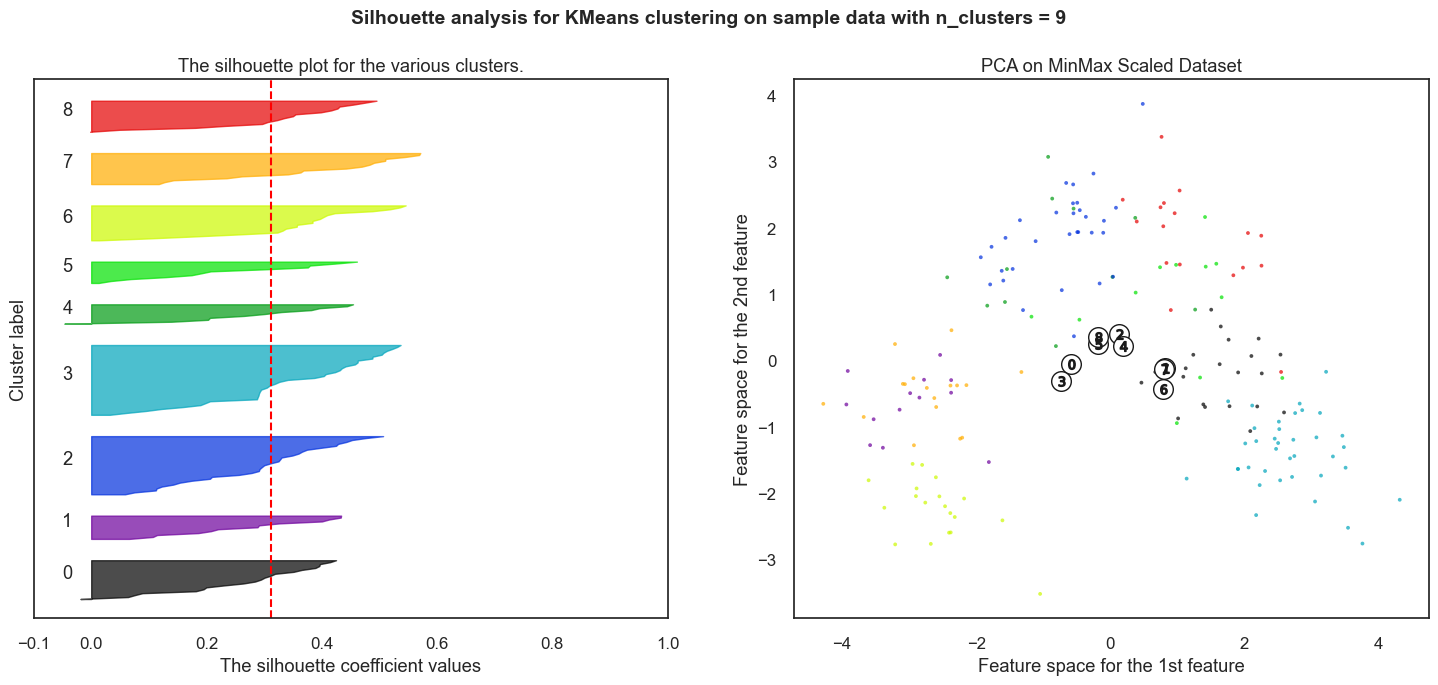

In [77]:
#using sklearn library  for kmeans clustering 
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_components_min_final) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pca_components_min_final)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_components_min_final, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_components_min_final, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_final.iloc[:,0], pca_final.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("PCA on MinMax Scaled Dataset")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Building our Kmeans algorithm with K=3

In [79]:
model_kmeans_min = KMeans(n_clusters=3,random_state=0,init='k-means++')
kmean_pred_min = model_kmeans_min.fit_predict(pca_components_min_final)
kmean_pred_min.shape

(178,)

In [80]:
#checking with our cluster ids 
model_kmeans_min.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [81]:
#checking with the centroids of clusters 
model_kmeans_min.cluster_centers_

array([[ 7.94800855e-01, -2.39602856e-01,  6.92839230e-04],
       [ 2.07947321e-02,  3.49009117e-01,  4.45609801e-03],
       [-6.73001307e-01, -2.05684819e-01, -5.69033142e-03]])

In [82]:
#checking with our inertia, the lower the inertia , the better the clusters formed 
#it also means clusters are denser and closer to each other 
model_kmeans_min.inertia_

16.734135217329108

In [83]:
df2['Kmeans_label_min'] = model_kmeans_min.labels_

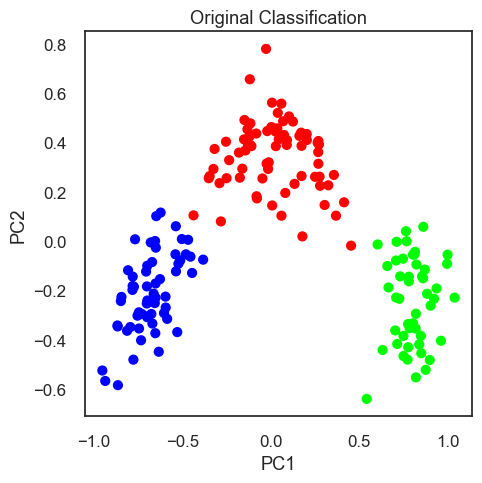

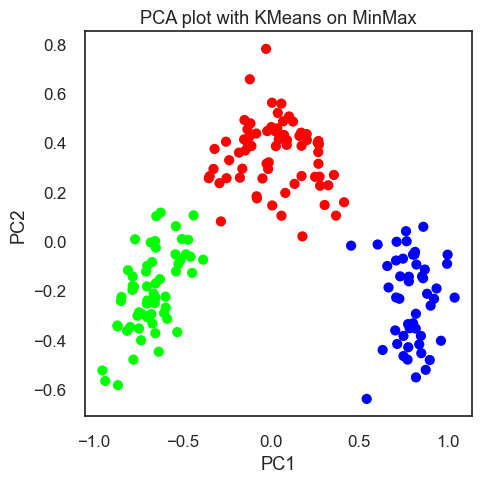

In [88]:
#plotting with original and after application of pca on minmax scaler
# Scatterplot
plt.figure(figsize=(5,5))
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Type'], cmap="brg", s=40)
plt.title('Original Classification')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


plt.figure(figsize=(5,5))
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Kmeans_label_min'], cmap="brg", s=40)
plt.title('PCA plot with KMeans on MinMax')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [89]:
# Group data by Clusters (K=3)
df2.groupby('Kmeans_label_min').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity  \
                      mean       mean      mean      mean       mean   
Kmeans_label_min                                                       
0                 2.979592  13.151633  3.344490  2.434694  21.438776   
1                 2.000000  12.257246  1.908551  2.238551  20.063768   
2                 1.016667  13.732167  2.005000  2.458000  17.253333   

                   Magnesium   Phenols Flavanoids Nonflavanoids  \
                        mean      mean       mean          mean   
Kmeans_label_min                                                  
0                  99.020408  1.678163   0.797959      0.450816   
1                  94.043478  2.252609   2.076232      0.362319   
2                 106.883333  2.847833   2.980833      0.288667   

                 Proanthocyanins     Color       Hue  Dilution      Proline  
                            mean      mean      mean      mean         mean  
Kmeans_label_min                                                             
0                       1.163061  7.343265  0.685918  1.690204   627.551020  
1                       1.625652  3.057971  1.055739  2.786232   512.826087  
2                       1.900333  5.492000  1.066167  3.163500  1113.533333

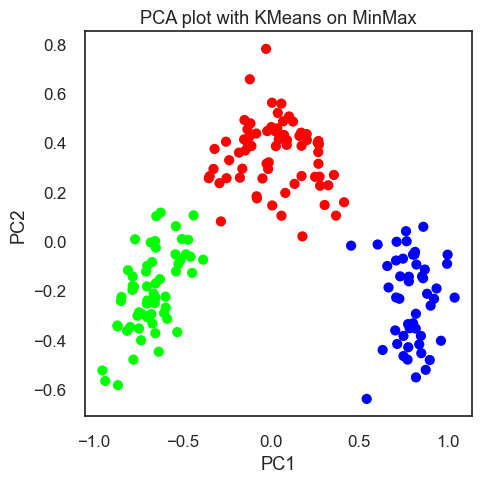

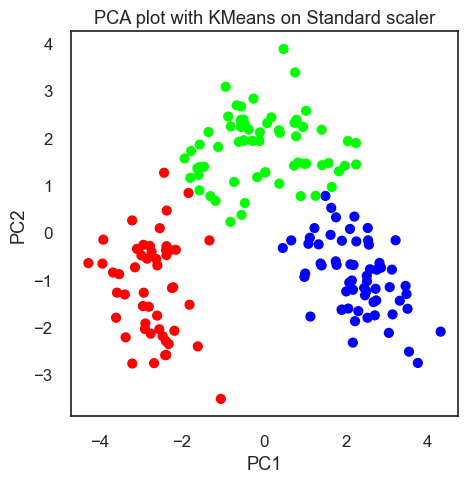

In [95]:
#plotting the accuracy between minmax and standard scaler 
plt.figure(figsize=(5,5))
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Kmeans_label_min'], cmap="brg", s=40)
plt.title('PCA plot with KMeans on MinMax')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


plt.figure(figsize=(5,5))
plt.scatter(pca_final.iloc[:,0], pca_final.iloc[:,1], c=df['Kmeans_label_std'], cmap="brg", s=40)
plt.title('PCA plot with KMeans on Standard scaler')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Since after clustering with both types of normalization or feature scaling data we have observed that we have achieved best distingushing between clusters on our MinMax scaled data and the aggregate also tells us that the wine have been divided into 3 Types,1,2 and 3 respeectively,if we observe our clusters we can easily distinguish between the percentages of the independent variables and find out the types of wine

## T-SNE (t - Distributed Stochastic Neighbour Embedding)

In [107]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df_min_max)

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [109]:
tsne_df = pd.DataFrame(data=X_tsne,columns=['tsne_1','tsne_2'])

In [110]:
tsne_df

tsne_1     tsne_2
0   -13.342324 -11.294188
1    -9.685003  -9.718287
2   -10.820646 -13.074574
3   -12.612196 -14.356588
4    -7.232990 -11.867942
..         ...        ...
173  11.962235  16.589642
174  10.621859  17.359783
175  10.679085  18.205801
176   8.714408  17.334146
177  11.632592  17.564535

[178 rows x 2 columns]

Text(0, 0.5, 'tsne component 2')

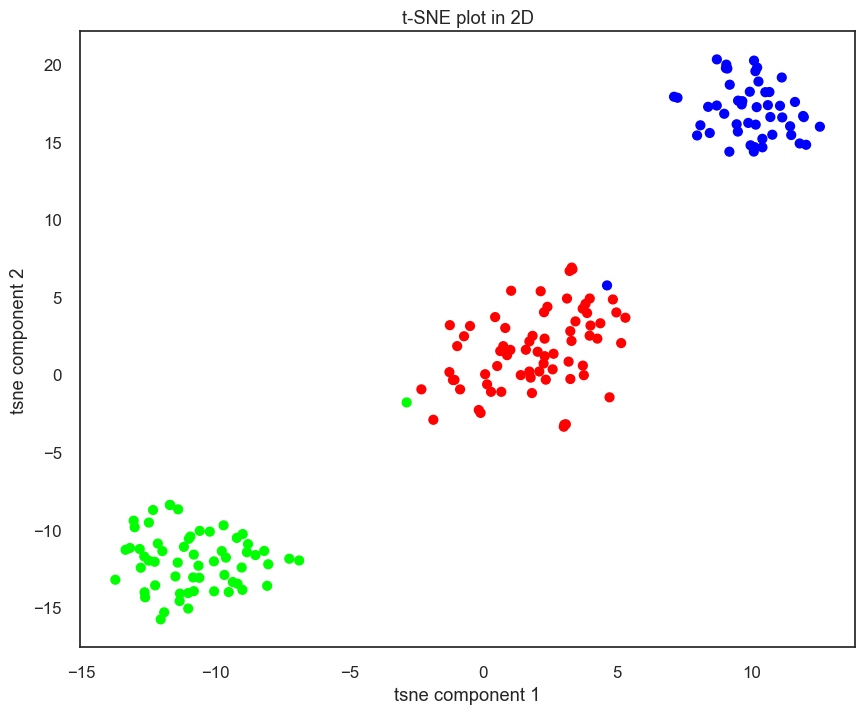

In [111]:
#since pca and tsne are unsupervised algorithms we will use the kmeans cluster for plotting 
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=df2['Kmeans_label_min'], cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

## Agglomerative clustering on minmax scaled data

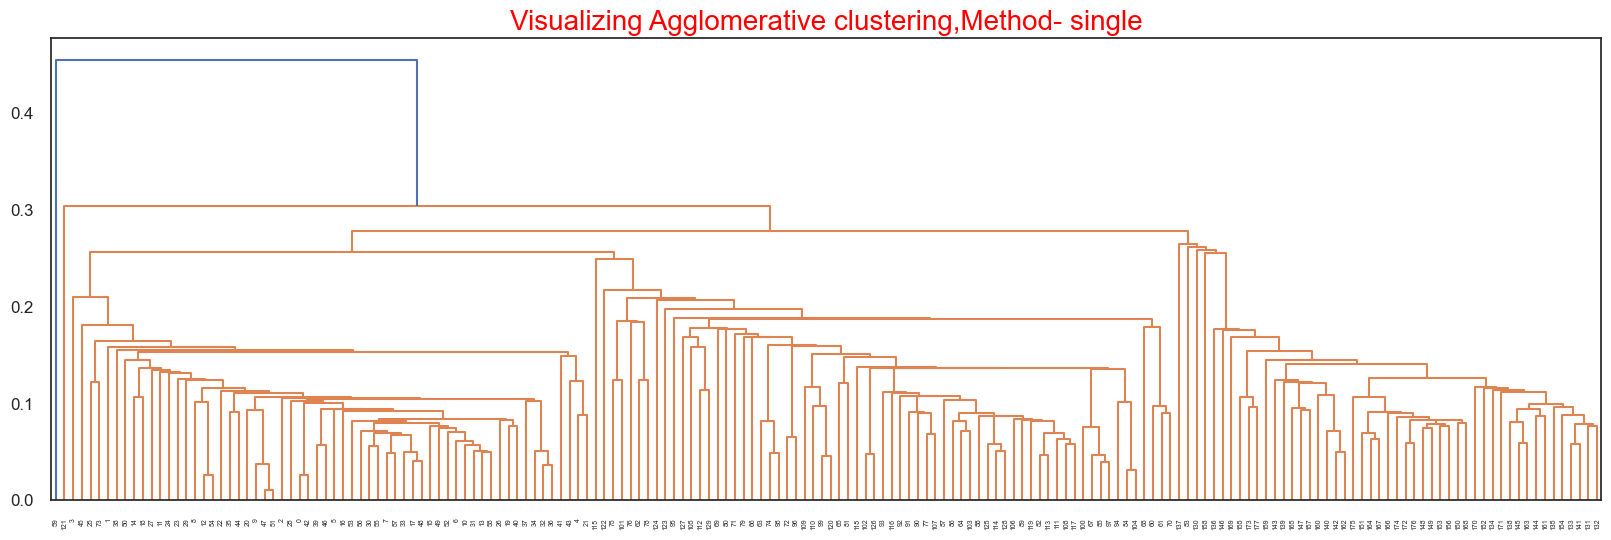

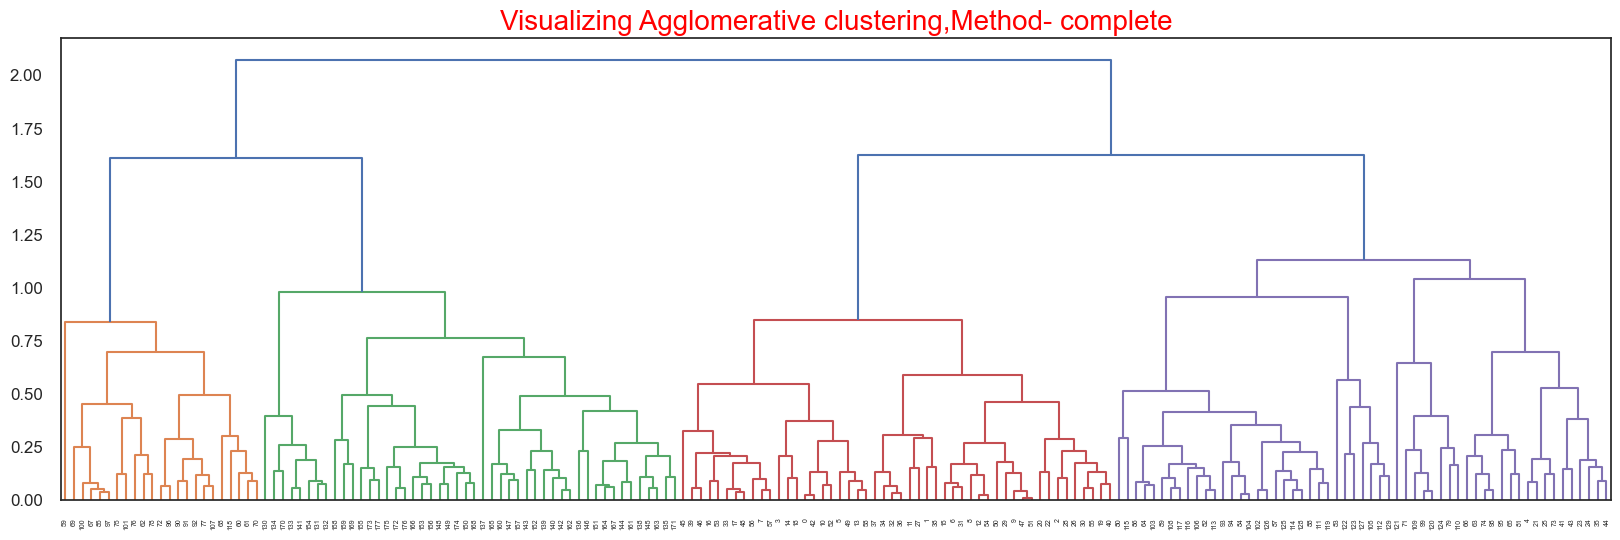

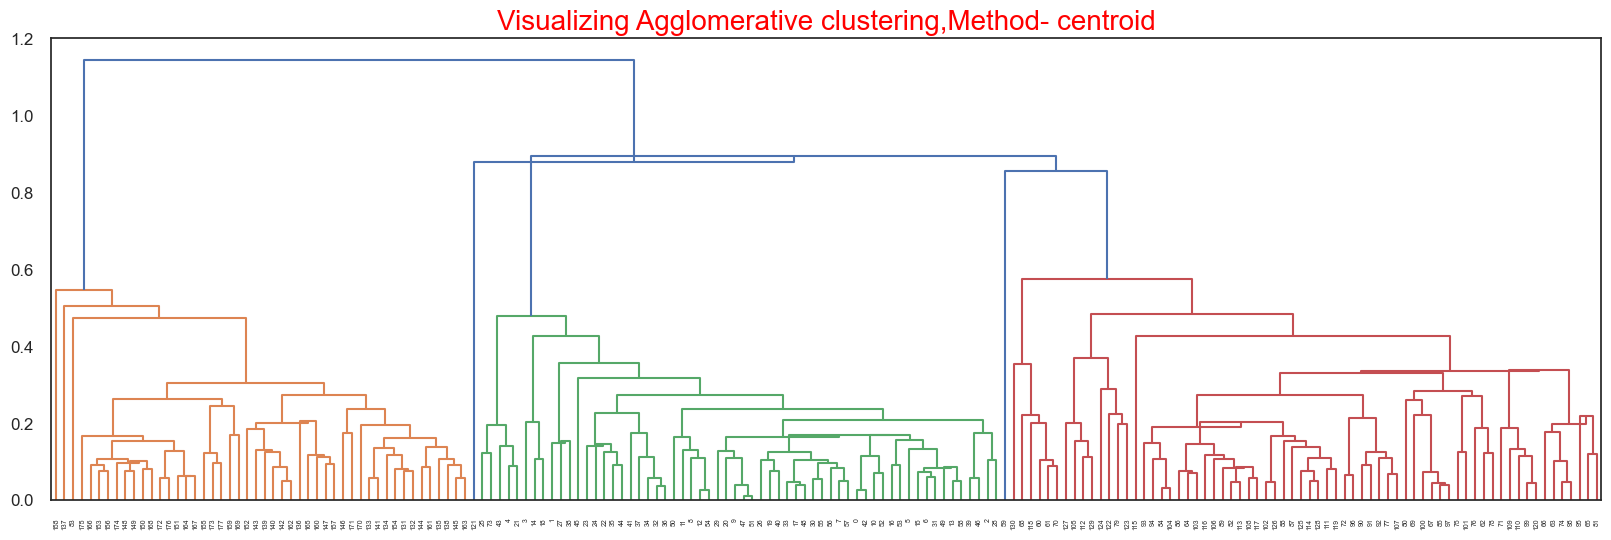

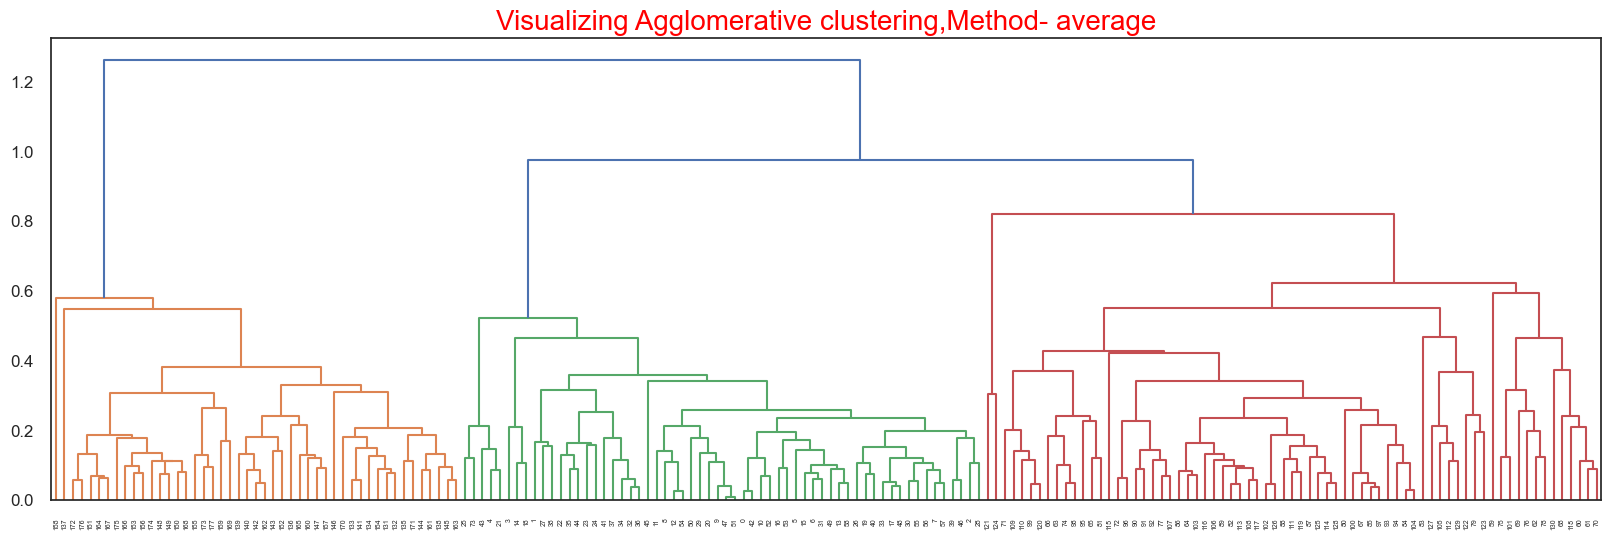

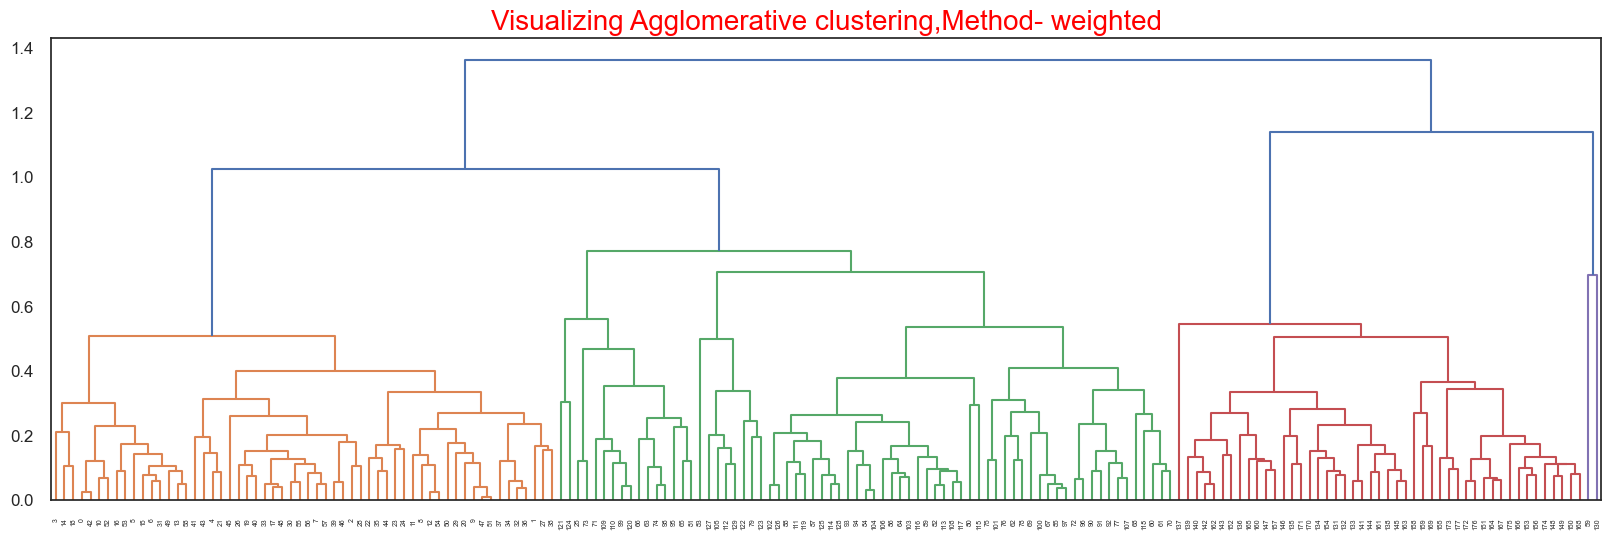

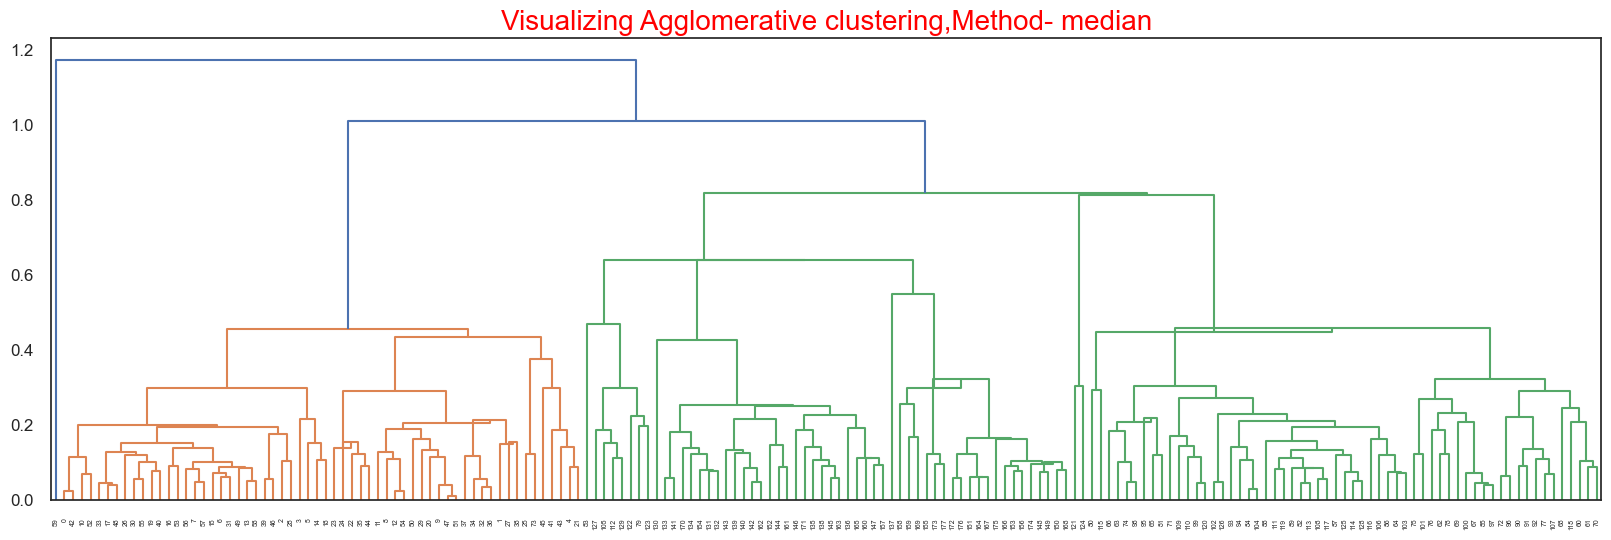

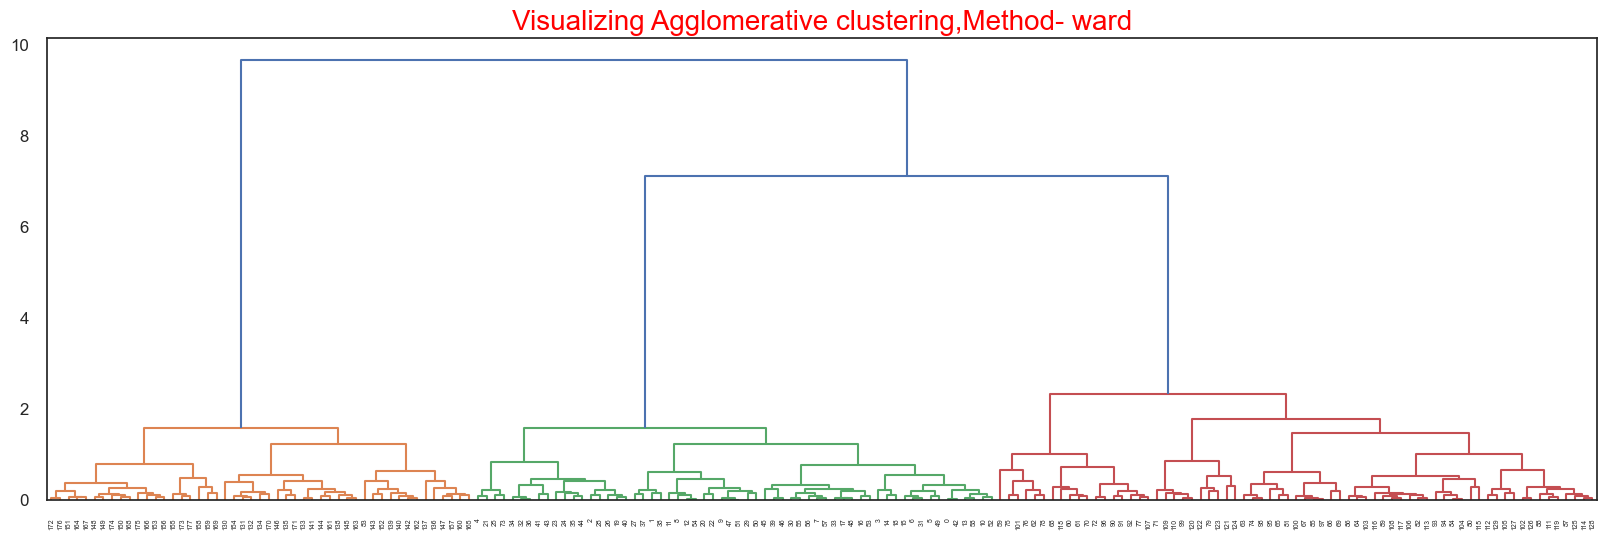

In [112]:
for methods in ['single','complete','centroid','average','weighted','median','ward']:
    plt.figure(figsize=(20,6))
    dict = {'fontsize':20,'fontweight':12,'color':'red'}
    
    plt.title('Visualizing data clustering,Method- {}'.format(methods),fontdict=dict)
    Dendrogram = sch.dendrogram(sch.linkage(pca_components_min_final,method=methods,optimal_ordering=False))

In [115]:
# Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single","ward"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_components_min_final)
        silhouette_score1 = silhouette_score(pca_components_min_final, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- single : 0.1956897297434469
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5028007154238558

For n_clusters = 3 The average silhouette_score with linkage- complete : 0.40905822282646803
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5673677512398139
For n_clusters = 3 The average silhouette_score with linkage- single : 0.06455702366101262
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5742903318722891

For n_clusters = 4 The average silhouette_score with linkage- complete : 0.42050509534084823
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5202861583932612
For n_clusters = 4 The average silhouette_score with linkage- single : 0.32937895719670207

In [127]:
# Applying Different Linkages using Different Distance Methods
# Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single","ward"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_components_min_final)
            silhouette_score1 = silhouette_score(pca_components_min_final, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4106437562148734

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.4954520

## Agglomerative clustering on Standard scaled data

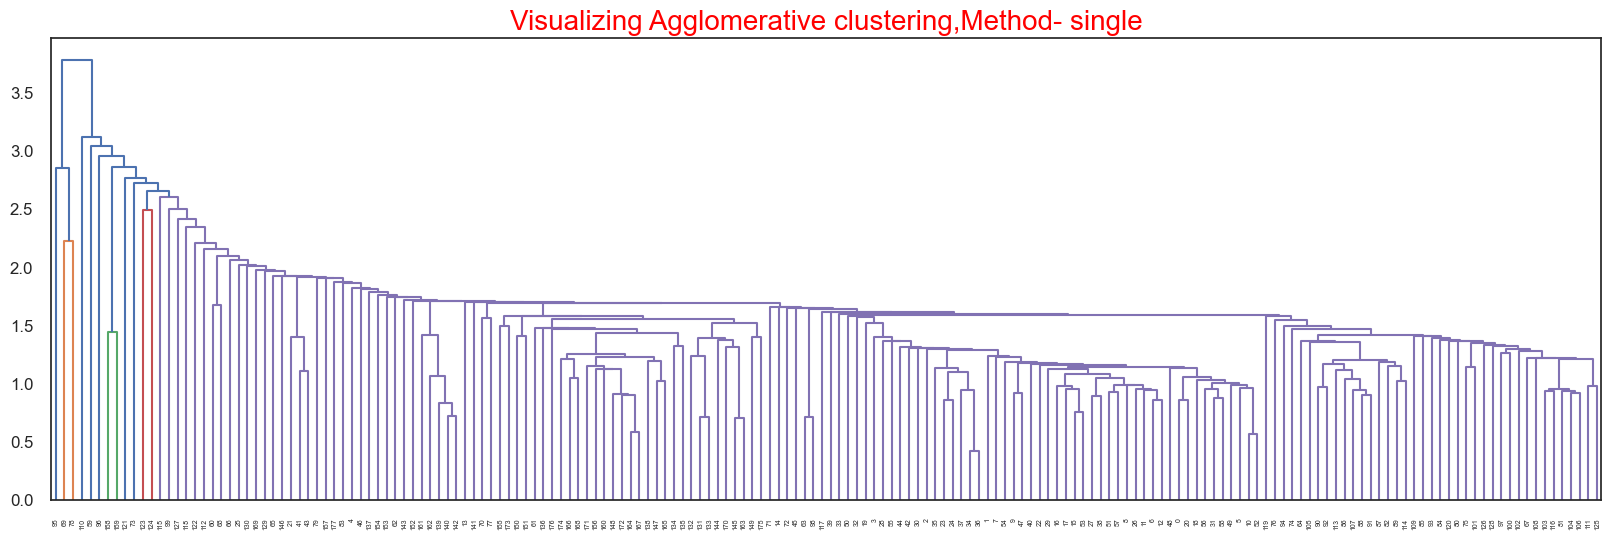

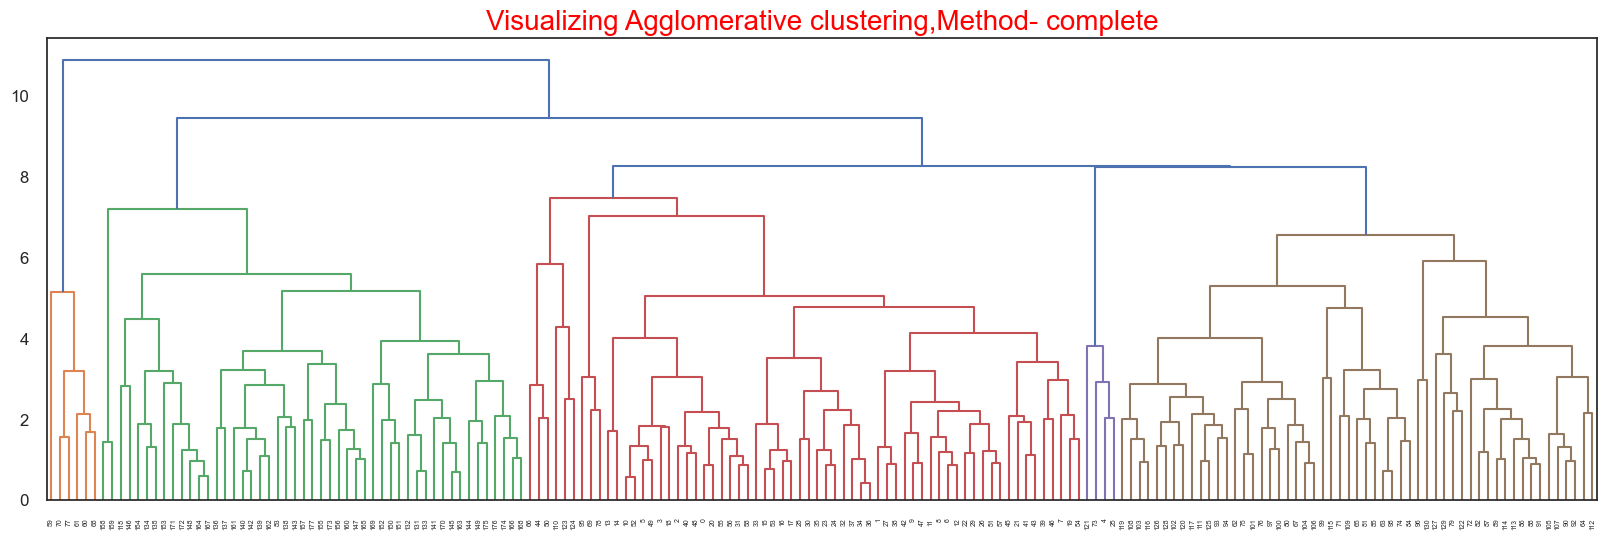

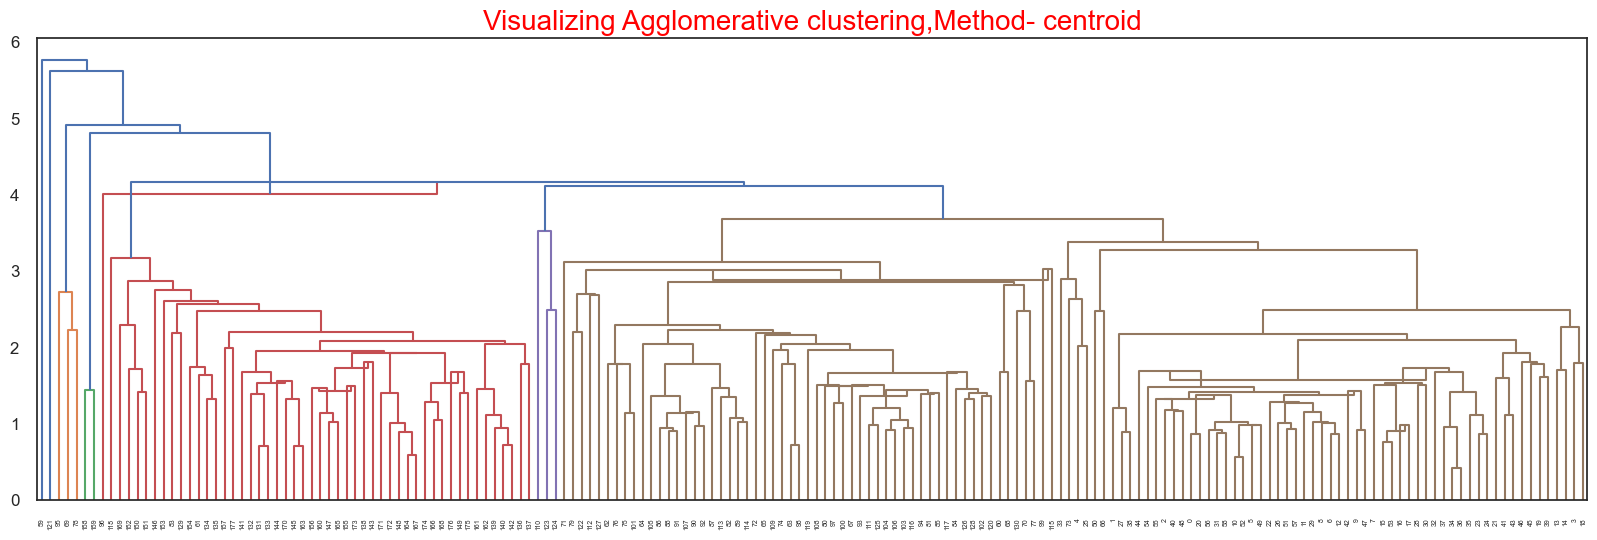

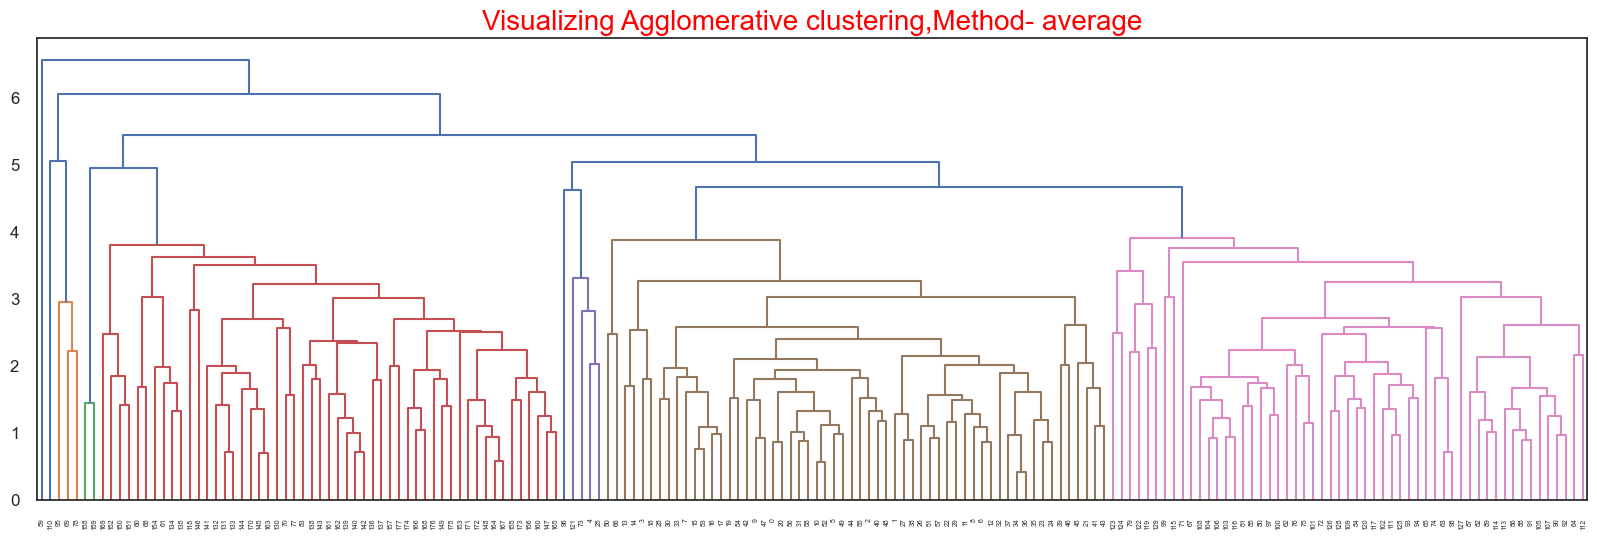

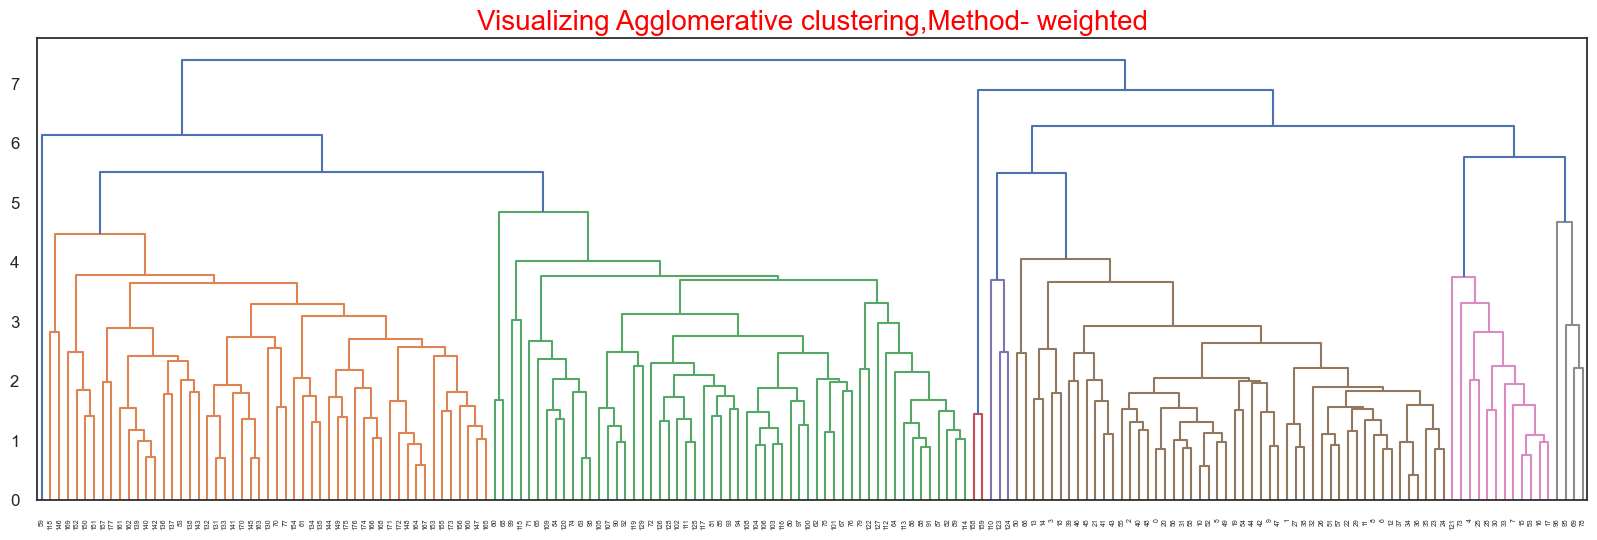

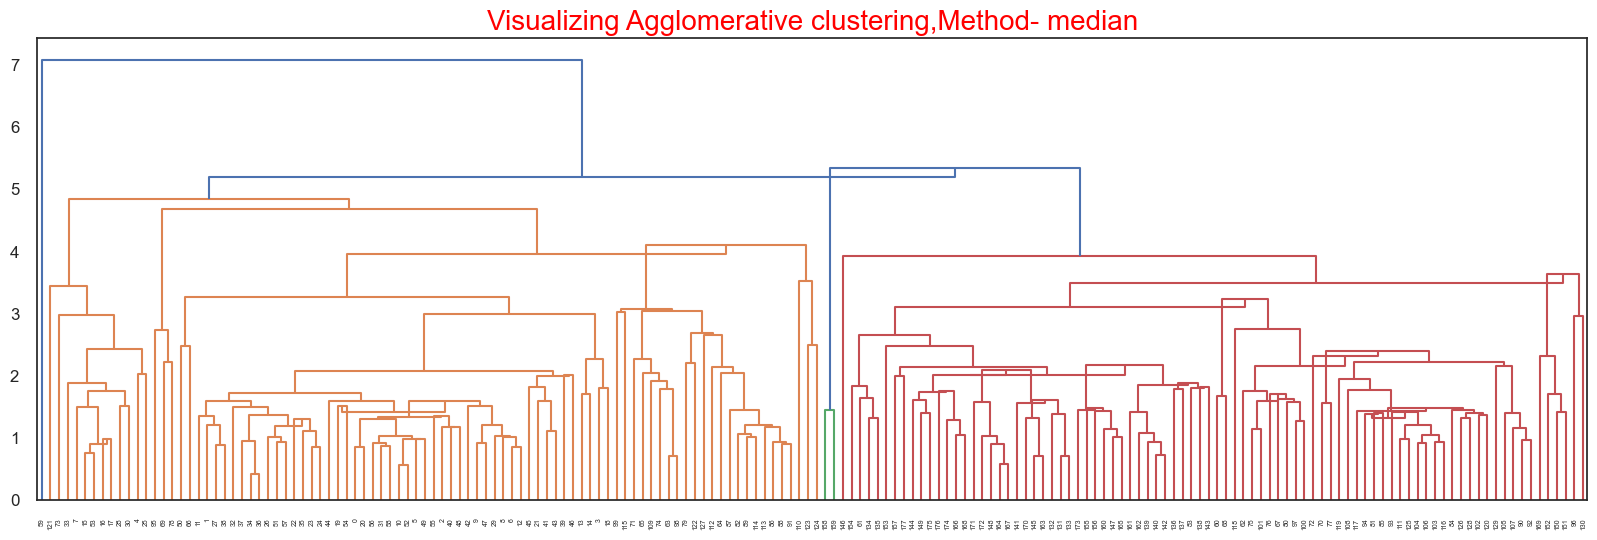

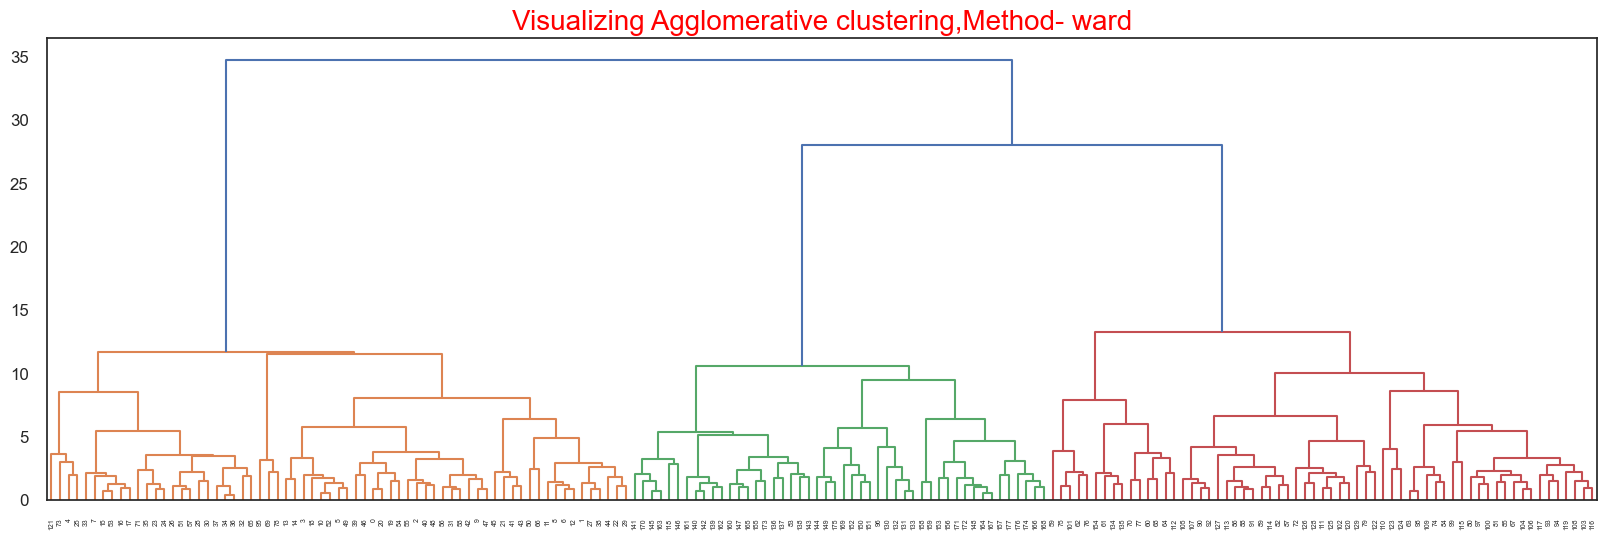

In [128]:
for methods in ['single','complete','centroid','average','weighted','median','ward']:
    plt.figure(figsize=(20,6))
    dict = {'fontsize':20,'fontweight':12,'color':'red'}
    
    plt.title('Visualizing data clustering,Method- {}'.format(methods),fontdict=dict)
    Dendrogram = sch.dendrogram(sch.linkage(pca_final,method=methods,optimal_ordering=False))

In [129]:
# Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single","ward"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_final)
        silhouette_score1 = silhouette_score(pca_final, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.044496369450363116
For n_clusters = 2 The average silhouette_score with linkage- average : 0.28077784199633277
For n_clusters = 2 The average silhouette_score with linkage- single : 0.24760969845936331
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2806399468468385

For n_clusters = 3 The average silhouette_score with linkage- complete : 0.20270975236742092
For n_clusters = 3 The average silhouette_score with linkage- average : 0.20371654141944698
For n_clusters = 3 The average silhouette_score with linkage- single : 0.20465340965013604
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.30874273928315926

For n_clusters = 4 The average silhouette_score with linkage- complete : 0.25829092472887544
For n_clusters = 4 The average silhouette_score with linkage- average : 0.27257611744532717
For n_clusters = 4 The average silhouette_score with linkage- single : 0.1692320091

In [130]:
# Applying Different Linkages using Different Distance Methods
# Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single","ward"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_final)
            silhouette_score1 = silhouette_score(pca_final, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.044496369450363116
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.044496369450363116
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.044496369450363116
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.044496369450363116
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.044496369450363116

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.28077784199633277
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.28077784199633277
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.28077784199633277
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhatta

After observation with both MinMax scaling and standard scaling we have observed that we have got a good score for minmax scaled:

 ward and Affinity- manhattan : 0.5742903318722891




## running our agglomerative clustering with optimal parameters

In [132]:
agg_clus = AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
pred_hie = agg_clus.fit_predict(pca_components_min_final)
print(pred_hie.shape)
pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [135]:
# Clustering Score

(silhouette_score(pca_components_min_final, agg_clus.labels_)*100).round(3)

57.429

In [137]:
df2['Hierarchical_labels'] = agg_clus.labels_
df2.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   Kmeans_label_min  Hierarchical_labels  
0                 2                    2  
1                 2                    2  
2                 2                    2  
3                 2                    2  
4                 2                    2

In [138]:
df2.groupby('Hierarchical_labels').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_labels                                                       
0                    2.000000  12.257246  1.908551  2.238551  20.063768   
1                    2.979592  13.151633  3.344490  2.434694  21.438776   
2                    1.016667  13.732167  2.005000  2.458000  17.253333   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_labels                                                  
0                     94.043478  2.252609   2.076232      0.362319   
1                     99.020408  1.678163   0.797959      0.450816   
2                    106.883333  2.847833   2.980833      0.288667   

                    Proanthocyanins     Color       Hue  Dilution  \
                               mean      mean      mean      mean   
Hierarchical_labels                                                 
0                          1.625652  3.057971  1.055739  2.786232   
1                          1.163061  7.343265  0.685918  1.690204   
2                          1.900333  5.492000  1.066167  3.163500   

                         Proline Kmeans_label_min  
                            mean             mean  
Hierarchical_labels                                
0                     512.826087              1.0  
1                     627.551020              0.0  
2                    1113.533333              2.0

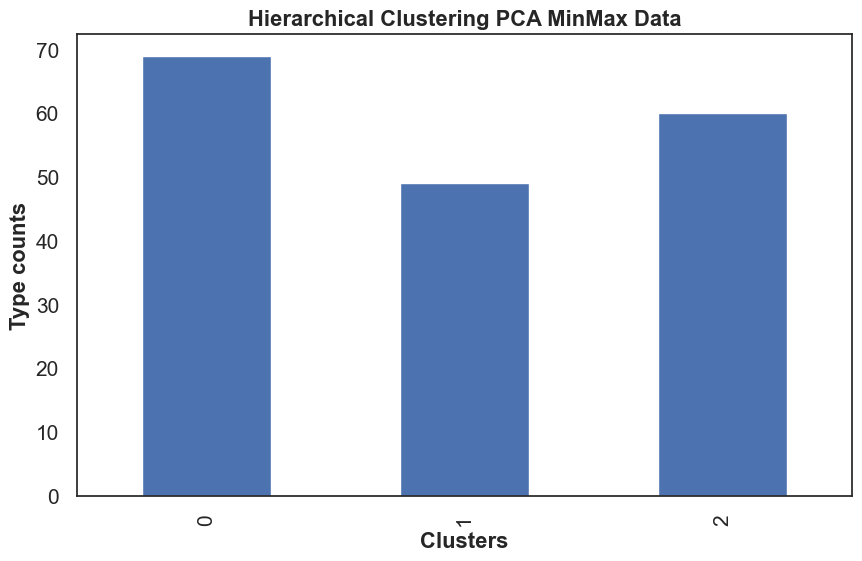

In [139]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df2.groupby(['Hierarchical_labels']).count()['Type'].plot(kind='bar')
plt.ylabel('Type Counts')
plt.title('Hierarchical Clustering PCA MinMax Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Type counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

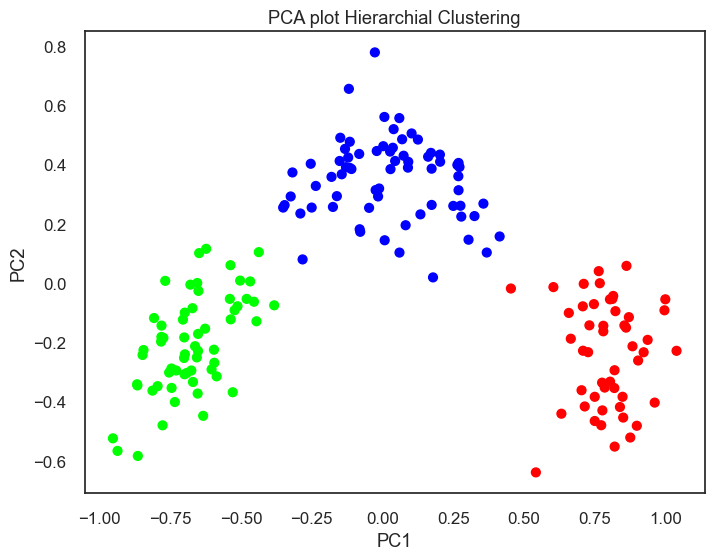

In [142]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot Hierarchial Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

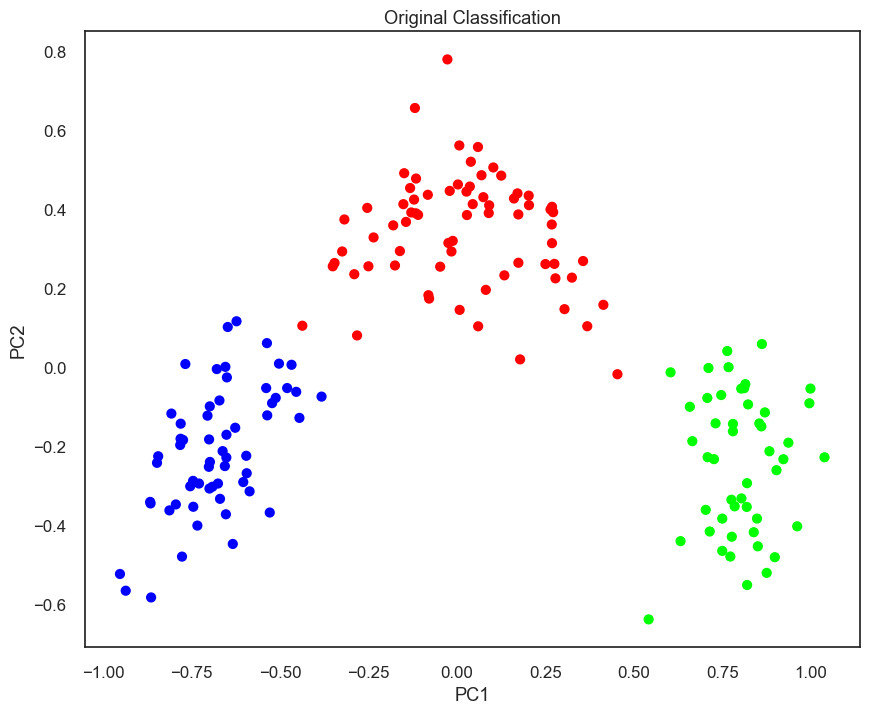

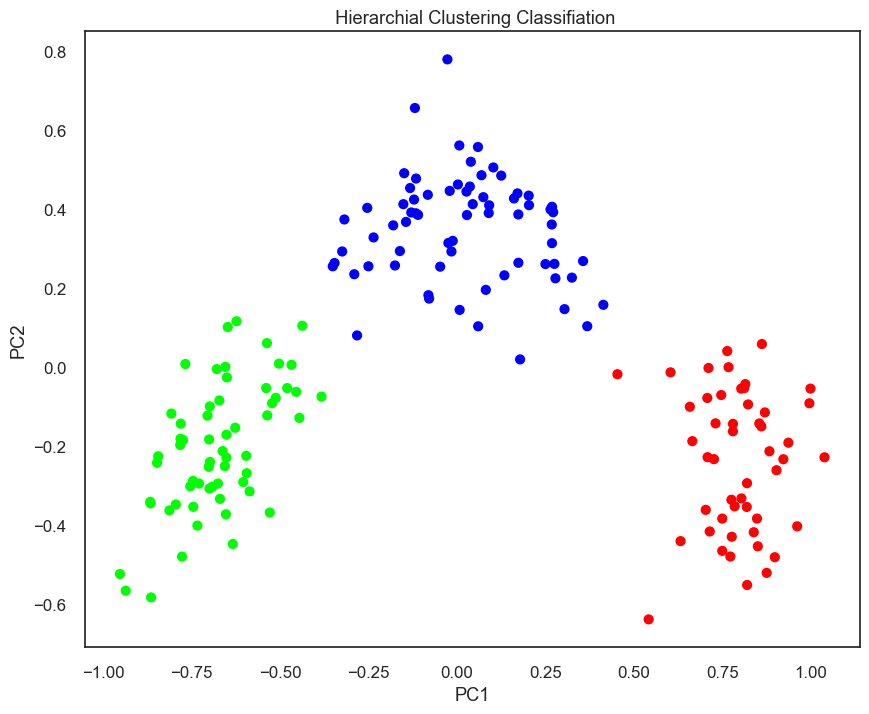

In [147]:
# Scatterplot
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()




# Scatterplot
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title(' Hierarchial Clustering Classifiation')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [150]:
df2.groupby('Hierarchical_labels').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_labels                                                       
0                    2.000000  12.257246  1.908551  2.238551  20.063768   
1                    2.979592  13.151633  3.344490  2.434694  21.438776   
2                    1.016667  13.732167  2.005000  2.458000  17.253333   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_labels                                                  
0                     94.043478  2.252609   2.076232      0.362319   
1                     99.020408  1.678163   0.797959      0.450816   
2                    106.883333  2.847833   2.980833      0.288667   

                    Proanthocyanins     Color       Hue  Dilution  \
                               mean      mean      mean      mean   
Hierarchical_labels                                                 
0                          1.625652  3.057971  1.055739  2.786232   
1                          1.163061  7.343265  0.685918  1.690204   
2                          1.900333  5.492000  1.066167  3.163500   

                         Proline Kmeans_label_min  
                            mean             mean  
Hierarchical_labels                                
0                     512.826087              1.0  
1                     627.551020              0.0  
2                    1113.533333              2.0

Conclusions

1)We have applied pca on both standardized types of data and we found out we got best results with minmax scaler, also we have compared the classification of clusering on both types of normalization.

2)we have performed Kmeans with optimal selection of clusters for both KMeans and Hierarchial clustering and we observed the classification.

3)PCA is a unsupervised and black box technique of dimensionality reduction and pca helps us to reduce our dimensions with analysis of variance and cumulative  variance and also with visualization of scree plot 

4)the drawbacks of PCA is that we are unable to know which feature has been given importance from our original dataset and also we cannot say that a particular feature has been selected from our original dataset.